## Анализ оттока клиентов банка "Метанпромбанк".

**Цель:** провести анализ оттока клиентов банка, сегментировать их по уровню риска ухода и на основе данных подготовить рекомендации для отдела маркетинга, чтобы снизить отток и повысить удержание клиентов.

**Задачи:**
- Выполнить исследовательский анализ данных, включающий:
    * распределение параметров в разрезе влияния на отток;
    * изучение корреляции оттока между параметрами.
- Проверить гипотезы:
    * Гипотеза 1: различие дохода ушедших и оставшихся клиентов;
    * Гипотеза 2: различие уровня оттока между городами;
    * Гипотеза 3: отсутствие связи между возрастом клиентов и оттоком;
    * Гипотеза 4: повышенный отток среди клиентов с доходом 270–350 т.руб и доходом 220-270 т.руб.
- Произвести сегментация клиентов по риску ухода. Параметры сегмента: клиентов>500, отток>30%. 
- Подготовить презентацию в формате pdf.

<a name='Описание-данных'>**Описание данных** <br> </a>
В файле `bank_scrooge.csv` находится данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск. <br> 

Набор данных включает следующие поля:<br><br>

* USERID — идентификатор клиента,
* score — баллы кредитного скоринга,
* city — город,
* gender — пол (М-мужской, Ж-женский),
* age — возраст,
* equity — количество баллов собственности,
* balance — баланс на счёте (для ушедших клиентов - на момент ухода),
* products — количество продуктов, которыми пользуется клиент,
* credit_card — наличие кредитной карты (0-кредитных карт нет, 1-кредитные карты есть),
* last_activity — активный клиент на текущий момент или момент ухода (0-неактивный, 1-активный),
* EST_SALARY — оценочный доход клиента,
* сhurn — признак оттока.     
     
<br> <p>
*Для ушедших клиентов предоставлены данные до ухода*


In [1]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from itertools import combinations # составление комбинаций

### Открытие файлов с данными и вывод общей информации

In [2]:
# адреса локальных файлов
files = ['*.csv']

# URLs на файлы
urls = [r'***.csv']

try: # по возмажности локальный файл
    df = pd.read_csv(files[0])
except: # иначе URL
     df = pd.read_csv(urls[0])
    
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
df.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


* Всего 10000 строк
* Есть пропуски в полях `age`, `balance`
* Поле `score` содержит целочисленное значение, но в типе 'float64'
* Поле `age` содержит целочисленное значение, но в типе 'float64' (предположительно из-за пропусков)
* Все клиенты совершеннолетние
* Есть клиенты с 0 продуктов банка. Необходимо изучить подробнее.


In [5]:
df[df.duplicated()] # проверка на полные дубликаты

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn


Полных дубликатов не обнаружено

In [6]:
# проверим, есть ли в поле score float значения
sum((df.score %1) != 0) # остаток от деление на 1

0

In [7]:
# проверим, есть ли в поле age float значения за исключением пропусков
sum((df.age.dropna() %1) != 0) # остаток от деление на 1

0

Тип 'float64' присвоен из за пропусков в поле `age` и по ошибки в поле `score`.

Необходимо обработать данные:
- Обработать наименований полей
- Обработать пропуски в полях `age`, `balance`
- Поля `score` и `age` перевести в тип 'int' или 'Int64' в зависимости от обработки пропусков
- Проверить клиентов, у которых указано нулевое количество используемых продуктов
- Бинаризация данных по полям `city` и `gender`
- Проверить на неполные дубликаты

### Предобработка данных

#### Обработка наименований полей

Переведем название полей в нижний регистр и разделителем '_'.

In [8]:
# переводим в нижний регистр название столбцов
df.columns = df.columns.str.lower()
# разделитель '_' для поля 'userid'
df = df.rename(columns={'userid':'user_id'})

df.sample(3) # проверка

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
941,187037,831.0,Ярославль,Ж,72.0,1,302932.33,2,0,1,72879.93,0
2284,176257,878.0,Ростов,М,62.0,0,NaN,2,0,0,112376.49,0
2982,146534,810.0,Ростов,М,28.0,3,168414.78,2,0,0,37066.88,0


#### Обработка пропусков

Выведем поля с пропусками по полю `age`. Их 26 шт.

In [9]:
# выводим пропуски по age
df[df.age.isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


В строках с пропусками по полю `age` довольно много пропусков по полю `balance`. Но возможно это совпадение т.к. по этому полю всего 2295 пропусков (≈23% от всех данных) и некоторые строки имеют указанный баланс. Большинство клиентов с пропусками по `age` являются действующими клиентами (за исключением одного). <br>
Поскольку невозможно стать клиентом банка без указания года рождения, вероятно, пропуски связаны с технической ошибкой или некорректным заполнением данных. **Рекомендуется проверить исходные данные и, при необходимости, исправить базу.** <br>
<p>
    Нет возможности восстановить возраст расчетным методом, так как отсутствует явная связь между возрастом и другими параметрами. <br>
<p>
    
**Поскольку строк с пропусками в `age` очень мало (26 строк, менее 0,3%), их можно удалить, чтобы они не оказывали влияние анализ.**

In [10]:
# удаляем данные с пропусками age
df = df[df.age.notna()]

df[['user_id','balance', 'age']].info() # проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  9974 non-null   int64  
 1   balance  7695 non-null   float64
 2   age      9974 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 311.7 KB


Выведем поля с пропусками по полю `balance`. После удаления пропусков по `age`, осталось пропусков по `balance` 2279 шт (≈23%). Из-за большого количества пропусков выведем основные параметры статистики.

In [11]:
# выводим параметры с пропусками по balance
df[df.balance.isna()].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2279.000000,2279.000000,2279.000000,2279.000000,0.0,2279.000000,2279.000000,2279.000000,2.279000e+03,2279.000000
mean,171904.885915,865.357174,42.093023,0.051338,NaN,1.163229,0.815270,0.548925,2.263454e+05,0.005704
std,33303.215270,89.553735,11.941551,0.226623,NaN,0.403713,0.388164,0.497710,1.998256e+05,0.075327
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,142992.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.202174e+05,0.000000
50%,172304.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.743479e+05,0.000000
75%,201257.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.403728e+05,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


В данных, где есть пропуски по полю `balance`, заметно ниже средний показатель количества баллов собственности (`equity`) и среднее количество ушедших клиентов (`churn`). При этом средний оценочный доход (`est_salary`) данных клиентов выше. <br>
Явных взаимосвязей между пропусками `balance` и другими числовыми данными не обнаруженно. <br>
Посмотрим на категориальные поля с пропусками по `balance`, возможно, есть взаимосвязь по ним.

In [12]:
# выводим категориальные данные с пропусками по balance
df[df.balance.isna()][['city', 'gender']].value_counts()

city       gender
Ярославль  М         830
           Ж         628
Рыбинск    М         317
           Ж         269
Ростов     М         125
           Ж         110
dtype: int64

Предоставлены все три города и распределение по полу чуть больше мужчин. Явных "фаворитов" не выявлено. <br>
Проверим соответствие пропуска нулевому балансу на счете. У нас есть данные по ушедшим клиентам с пропусками (их меньше среднего) и указание явно нулевого баланса в датасете. Проверим клиентов у которых явно указан баланс =0. 

In [13]:
# выведем клиентов с 0 на балансе
df[df.balance==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0


Таких клиентов всего 0, причем один из них активный (`last_activity`). Оба клиента являются действующими и пользуются двумя продуктами банка. Возможно, этим клиентам нужны другие услуги банк и они не используют расчетный счет. <br>
Пропусков по `balance` много и маловероятно, что все клиенты с пропусками не используют расчетный счет. Особенно с учетом того, что есть техническая возможность заполнять данные по балансу "0".

По предоставленным данным нельзя определить характер пропусков по полю `balance`. Т.к. данные по балансу на счете собираются в автоматическом режиме, то высока вероятность технической ошибки при сборе или выгрузки данных. **Рекомендуется проверить исходные данные и произвести тщательный анализ пропусков.** <p>
   
Исходя из вышеизложенного - **оставим пропуски без изменений, что позволит исключить некорректные значения по полю `balance`, при этом сохранив остальную информацию.**

#### Преобразование типа данных в полях

Переводим поля `score` и `age` в тип 'int'

In [14]:
# переводим поля score, age в тип 'int'
temp_list = ['score', 'age'] # временный список

for field_name in temp_list: # переводим в другой тип по очереди
    df[field_name] = df[field_name].astype('int')

df.info() # проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1013.0+ KB


#### Проверка на нулевое кол-во продуктов

Выведем клиентов которые не пользуются продуктами банка.

In [15]:
# клиенты, которые не пользуеются продуктами банка
df[df.products==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


Есть всего один клиент с указанным количеством продуктов =0. У него также не указан баланс на счете и он попал в отток. Согласно данным, если клиент ушел, то предоставлены данные до его ухода. Возможно, данного клиента зарегистрировали  в банке по ошибке или случайно, и он никогда не пользовался услугами банка. **Удалим этого клиента.** 

In [16]:
# удаляем клиента с 0 в products
df = df[df.products!=0]

df.info() # проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   int64  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int64  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1012.9+ KB


#### Проверка на дубликаты

Проверим на неполные дубликаты по полю `user_id`

In [17]:
# выводим количество строк с дубликатами по user_id
df[df['user_id'].duplicated()].shape[0]

50

Есть 50 строк с дубликатами по `user_id`. Выведем несколько дубликатов для анализа.

In [18]:
# выводим несколько дубликатов по user_id
df[df['user_id'].duplicated(keep=False)].sort_values('user_id').head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
1411,123461,829,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0
8164,124450,859,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1


In [19]:
# выведем параметры
df[df['user_id'].duplicated(keep=False)].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,100.000000,100.000000,100.000000,100.000000,8.100000e+01,100.000000,100.000000,100.000000,100.000000,100.000000
mean,175339.760000,858.070000,41.140000,2.970000,1.062349e+06,2.220000,0.630000,0.610000,156960.793000,0.500000
std,33290.249664,59.038466,11.386701,2.100769,1.728990e+06,0.970057,0.485237,0.490207,155337.338055,0.502519
min,116540.000000,714.000000,22.000000,0.000000,6.250447e+04,1.000000,0.000000,0.000000,20528.560000,0.000000
25%,149365.000000,819.750000,33.000000,0.750000,3.700277e+05,2.000000,0.000000,0.000000,87156.830000,0.000000
50%,173936.000000,863.500000,38.000000,3.000000,6.485940e+05,2.000000,1.000000,1.000000,120114.865000,0.500000
75%,208738.000000,903.000000,45.250000,5.000000,1.203377e+06,3.000000,1.000000,1.000000,167181.400000,1.000000
max,227795.000000,990.000000,77.000000,7.000000,1.464869e+07,5.000000,1.000000,1.000000,955144.850000,1.000000


In [20]:
# выводим количество дубликатов по ID и городу
df[df[['user_id', 'city']].duplicated(keep=False)].shape[0]

0

In [21]:
# выводим количество дубликатов по ID и полу
df[df[['user_id', 'gender']].duplicated(keep=False)].shape[0]

36

Все дубликаты по `user_id` равномерно распределены между двумя городами — Рыбинском и Ярославлем — и в равных пропорциях по полу. При этом один и тот же ID может встречаться в разных городах, а по полу значения бывают как одинаковыми, так и разными. Будем считать распределение по полу случайным, несмотря на странное совпадение в пропорции 50/50. <br>

Также стоит обратить внимание на значительную разницу в возрасте клиентов для некоторых дубликатов. Это говорит о том, что под одним ID зарегистрированы разные люди, проживающие в разных городах. <br>

Тот факт, что дубликаты встречаются только в 2х из 3х городов и всего у 25 ID, указывает на то, что дублирование `user_id` не носит системного характера. Вероятно, это было вызвано временной (или уже устраненной) технической ошибкой при регистрации клиентов в разных филиалах банка. <br>

Поскольку поле `user_id` не потребуется в дальнейшем анализе, дубликаты можно оставить без изменений.

#### Вывод по разделу

**Удалено:**
- 26 строк с пропусками `age`.
- 1 строка с нулевым количеством используемых продуктов.
<br><br>

**Обработано:**
- Исправлены типы данных.
<br><br>

**Дополнительно:**
- Переименованы поля.
- Пропуски по полю `balance` (2278 строк) оставили без изменений.
- Дубликаты по user_id оставили без изменений т.к. они обозначают разных клиентов банка.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   int64  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int64  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1012.9+ KB


### Исследовательский анализ данных (EDA)

#### Общее распределение категориальных данных

Проверим общее распределение категориальных данных

In [23]:
def count_tables(data, columns):
    '''
    функция для отображение распределения категориальных данных
    в табличном виде
    ----------
    data : DataFrame с исходными данными
    columns : list с списком полей по которым произвести рассчет
    ----------
    return : отображает DataFrame
    '''
    for col in columns:
        # рассчитываем количество значений
        count_table = df.groupby(col)['user_id'].count().reset_index()
        count_table = count_table.rename(columns={'user_id':'count'}) # rename 

        # добавляем отношение в %
        count_table['percent'] = round(
            (count_table['count'] / count_table['count'].sum())*100, 0)
        
        display(f'Распределение по полю {col}')
        display(count_table) # отображаем df
        
count_tables(df, [
    'city', 'gender','equity', 'products', 
    'credit_card', 'last_activity', 'churn']) # отображаем распределение

'Распределение по полю city'

,city,count,percent
0,Ростов,1416,14.0
1,Рыбинск,2682,27.0
2,Ярославль,5875,59.0


'Распределение по полю gender'

,gender,count,percent
0,Ж,4982,50.0
1,М,4991,50.0


'Распределение по полю equity'

,equity,count,percent
0,0,2576,26.0
1,1,773,8.0
2,2,1051,11.0
3,3,1540,15.0
4,4,1847,19.0
5,5,1915,19.0
6,6,161,2.0
7,7,80,1.0
8,8,17,0.0
9,9,13,0.0


'Распределение по полю products'

,products,count,percent
0,1,3323,33.0
1,2,5119,51.0
2,3,1038,10.0
3,4,474,5.0
4,5,19,0.0


'Распределение по полю credit_card'

,credit_card,count,percent
0,0,3189,32.0
1,1,6784,68.0


'Распределение по полю last_activity'

,last_activity,count,percent
0,0,4758,48.0
1,1,5215,52.0


'Распределение по полю churn'

,churn,count,percent
0,0,8155,82.0
1,1,1818,18.0


* 18% клиентов ушло в отток.
* Больше половины клиентов в Ярославле (59%), потом идут в Рыбинске (27%) и Ростове (14%).
* Распределение по полу равномерное по 50% между мужчинами и женщинами. 
* Большинство клиентов имеют нулевой балл собственности (26%), основная часть клиентов имеет средние баллы собственности от 2 до 5 включительно (от 11% до 19%).
* Большинство клиентов (51%) пользуется двумя продуктами банка, одни продуктом пользуются 33%, тремя - 10%, четырьмя и более только 5%.
* 68% имеет кредитную карту/карты.
* 52% являются/являлись активными клиентами.


##### Графики для презентации

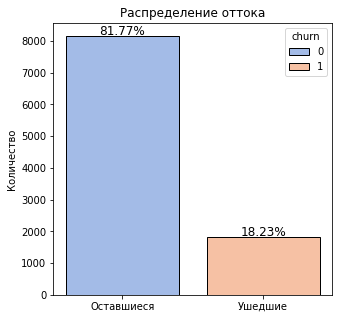

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
                        
sns.histplot(data=df, x='churn', hue='churn',
             discrete=True, shrink=0.8,  palette='muted')
 
# настройки графика
ax.set_title(f"Распределение оттока")
ax.set_ylabel('Количество', fontsize=10)
ax.set_xlabel('', fontsize=10)
plt.xticks(ticks=[0, 1], labels=['Оставшиеся', 'Ушедшие']) # замена 0 и 1 на текстовые метки

 # добавление меток (с указанием значений над каждым столбцом и процентом)
for p in ax.patches:
    abs_value = round(p.get_height(), 0) # абсолютное значение высоты столбца
    percent_value = round(abs_value/df.shape[0]*100, 2) # относительное значение
    if abs_value==0: # не отображаем нулевые значения
        obs_value='' # отображаемое значения
    else:
        obs_value=f'{percent_value}%' # отображаемое значения
    ax.annotate(obs_value, # отображаемое значения
        (p.get_x() + p.get_width() / 2, p.get_height()), # позиционирование по x,y
        ha='center', va='baseline', fontsize=12, color='black',
        xytext=(0, 1), textcoords='offset points')

plt.show()   

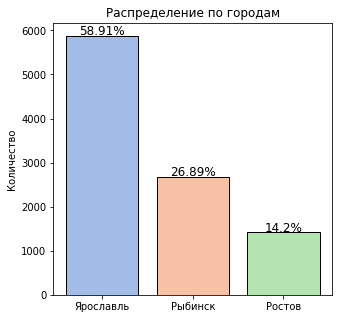

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
                        
sns.histplot(data=df.sort_values('city', ascending=False), x='city', hue='city',
             discrete=True, shrink=0.8,  palette='muted',
            legend=False)
 
# настройки графика
ax.set_title(f"Распределение по городам")
ax.set_ylabel('Количество', fontsize=10)
ax.set_xlabel('', fontsize=10)

# plt.xticks(labels=['Оставшиеся', 'Ушедшие']) # замена 0 и 1 на текстовые метки

 # добавление меток (с указанием значений над каждым столбцом и процентом)
for p in ax.patches:
    abs_value = round(p.get_height(), 0) # абсолютное значение высоты столбца
    percent_value = round(abs_value/df.shape[0]*100, 2) # относительное значение
    if abs_value==0: # не отображаем нулевые значения
        obs_value='' # отображаемое значения
    else:
        obs_value=f'{percent_value}%' # отображаемое значения
    ax.annotate(obs_value, # отображаемое значения
        (p.get_x() + p.get_width() / 2, p.get_height()), # позиционирование по x,y
        ha='center', va='baseline', fontsize=12, color='black',
        xytext=(0, 1), textcoords='offset points')

plt.show()   

#### Распределение оттока по параметрам

Зададим общий стиль и палитру для визуализаций. <br>
По необходимости можно изменить в самой визуализации.

In [26]:
# задаем стиль для графиков
sns.set_style('whitegrid')
#sns.set_palette('deep')
sns.set_palette('bright')

Определим необходимые функции для раздела.

In [27]:
# функция расчета оттока по параметру
def calc_churn_on_param (data, param):
    """
    Функция рассчитывает распределение оттока клиентов (churn) по заданному параметру.
     ----------
    data : DataFrame с исходными данными. Должен содержать 'user_id' и 'churn'.
    param : str с названием столбца в data, по которому анализируется отток
    ----------
    return : возвращает DataFrame с распределением оттока, содержаший поля: 
        - <param> - переданный параметр,
        - 'churn' - значение оттока, 
        - 'cnt_users' - кол-во клиентов в группе по параметру и оттоку,
        - 'percent' - процент клиентов от общего числа по параметру.
    ----------
    Пример использования: 
        calc_churn_on_param(df, 'city')
    """
    
    # расcчитываем кол-во клиентов по параметру и оттоку
    destrib_churn = data.groupby([param, 'churn'])['user_id'].count().reset_index()
    destrib_churn = destrib_churn.rename(columns={'user_id':'cnt_users'}) # rename 
    # получаем суммарное кол-во клиентов по параметру
    temp_all_users = destrib_churn.groupby(param)['cnt_users'].sum()

    # вычисляем отношение в % по параметру 
    destrib_churn['percent'] = round(
        destrib_churn['cnt_users'] / destrib_churn[param].map(temp_all_users)*100, 
                                1)

    return destrib_churn # возвращаем результат DataFrame

In [28]:
# функция для отрисовки графиков
def draw_distrib_density(data, param, flag_kde=True, 
                         flag_discrete=False, boxplot=False, 
                         name_param='None'):
    """
    Визуализирует распределение параметра с разбивкой по оттоку клиентов (churn).
    Строит два графика: гистограмму плотности и боксплот/столбчатую диаграмму.
    ----------
    data : DataFrame с данными, должен содержать столбец 'churn'
    param : str с название анализируемого признака в data
    flag_kde : bool, отображать ли кривую плотности (KDE) на гистограмме (default=True)
    flag_discrete : bool, является ли признак дискретным
                (для правильного отображения гистограммы) (default=False)
    boxplot : bool, если True - строит боксплот, если False - 
                        столбчатую диаграмму с процентами (default=False)
    name_param : str, отображаемое название параметра (для подписей осей) (default=param)
    limit_param : str, устанавливает лимит данных для отображения среза (default=None)
    ----------
    return : None, отображает графики. 
    *Для barplot с нечисловыми значениями используется сортировка по гистограмме.
    --------
    Пример использования: 
        draw_distrib_density(df, 'age', flag_kde=True, 
                         flag_discrete=True, boxplot=True, 
                         name_param='Возраст')
    """
    # если name_param не указан, то использовать наименование параметра
    if name_param=='None':
        name_param = param
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 7),
                    gridspec_kw={'width_ratios': [2, 1]} # соотношение размеров графиков
                          ) 

    # создаем график гистограмма плотности распределения
    sns.histplot(data, x=param, hue='churn', 
                 kde=flag_kde, # отобразить сглаживающую пряму (kde)
                 stat="density", # плотность вероятности (нормализация гистограммы)
                 common_norm=False, # нормализовывать каждую группу отдельно
                 discrete=flag_discrete, 
                 ax=ax[0])
    # настройки графика
    ax[0].set_title(f"Гистограмма плотности распределения оттока по {param}")
    ax[0].set_ylabel("Плотность", fontsize=12)
    ax[0].set_xlabel(name_param, fontsize=12)
    
    # блок под общие параметры распределения (boxplot)
    if boxplot:
        # создаем график параметры распределения
        # sns.boxplot(data, y=param, hue='churn', legend=True, palette='deep', ax=ax[1]) # нов.версия
        
        sns.boxplot(data=data, y=param, x='churn', hue='churn', palette='muted', ax=ax[1]) # старая версия
        ax[1].legend(loc='upper right', bbox_to_anchor=(1.1, 1),
                    title='churn') # добавление легенды вручную (для старой версии)
        
        # настройки графика
        ax[1].set_title(f"Параметры распределения")
        ax[1].set_ylabel(name_param, fontsize=12)
        ax[1].set_xlabel('отток', fontsize=12)
        
    # блок под общее распределение оттока по параметру (barplot)
    else:
        # получаем сортировку по гистограмме для нечисловых значений параметра

        if data[param].dtype.kind == 'O':
#             # для новой версии определяем на основании групировки гистограммы
#             order_list = []
#             for label in ax[0].get_xticklabels():
#                 order_list.append(label.get_text())
            order_list = data[param].unique()   # для старой на основе data (не завязана на гитограмму)
            # создаем график распределение оттока с сортировкой
            sns.barplot(data=calc_churn_on_param(data, param), x=param,
                        y='percent', hue='churn', palette='muted', ax=ax[1],
                        order=order_list)
        else: # создаем график распределение оттока без сортировкой
            sns.barplot(data=calc_churn_on_param(data, param), x=param,
                        y='percent', hue='churn', palette='muted', ax=ax[1])
        # добавление меток (с указанием значений над каждым столбцом и процентом)
        for p in ax[1].patches:
            abs_value = round(p.get_height(), 1) # абсолютное значение высоты столбца
            if abs_value==0: # не отображаем нулевые значения
                abs_value=''
            else:
                abs_value=f'{abs_value}%' # формат отображения
            ax[1].annotate(abs_value, # абсолютное значения
                (p.get_x() + p.get_width() / 1.5, p.get_height()), # позиционирование по x,y
                ha='center', va='baseline', fontsize=10, color='black',
                xytext=(0, 1), textcoords='offset points')
        # настройки графика
        ax[1].set_title(f"Распределения оттока по {param}")
        ax[1].set_ylabel("Процент")
        ax[1].set_xlabel(name_param, fontsize=12)
        
    plt.show();

##### Отток по score

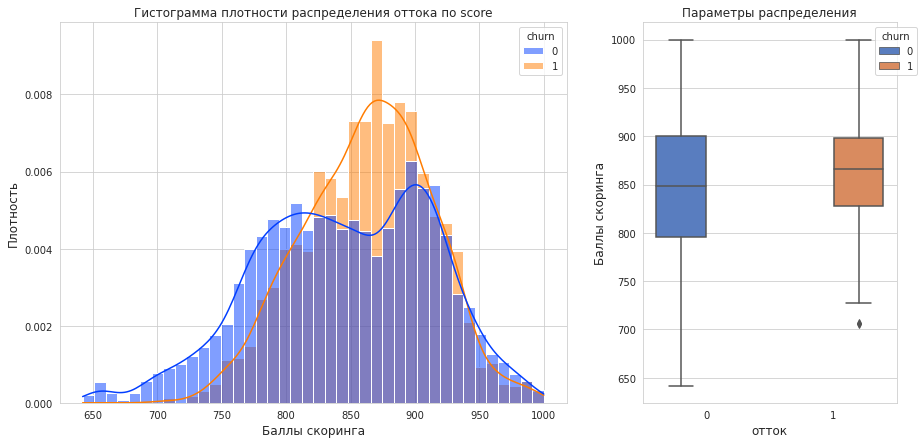

In [29]:
draw_distrib_density(df, 'score', flag_kde=True, 
                         flag_discrete=False, boxplot=True, 
                         name_param='Баллы скоринга')

Признаки оттока по `score`:
* Баллы кредитного скоринга в диапазоне от 830 до 910 включительно.
* Баллы кредитного скоринга в диапазоне от 930 до 940 включительно.
<br><br>

Общее распределение по `score`:
* У отточных клиентов медианный `score` выше, а разброс значений меньше.

##### Отток по city

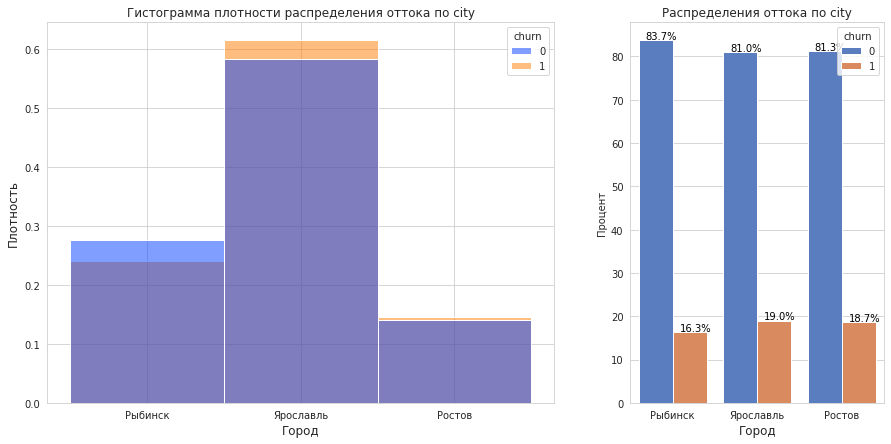

In [30]:
draw_distrib_density(df, 'city', flag_kde=False, 
                         flag_discrete=True, boxplot=False, 
                         name_param='Город')

Признаки оттока по `city`:
* Ярославль лидирует по доле уходящих клиентов.
<br><br>

Общее распределение по `city`:
* В целом доля оттока равномерная (16..19%), но Рыбинск показывает более высокую лояльность клиентов.

##### Отток по gender

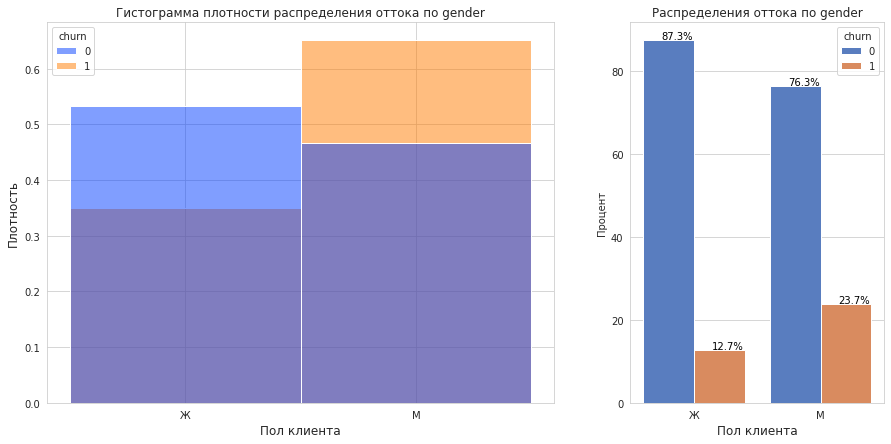

In [31]:
draw_distrib_density(df, 'gender', flag_kde=False, 
                         flag_discrete=True, boxplot=False, 
                         name_param='Пол клиента')

Признаки оттока по `gender`:
* Мужчины больше подвержены оттоку.
<br><br>

Общее распределение по `gender`:
* Доля оттока среди мужчин заметно выше, чем у женщин.

##### Отток по age

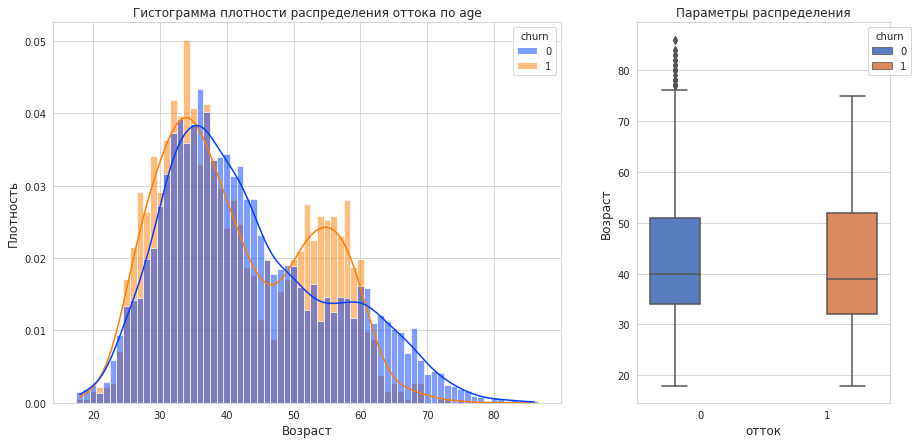

In [32]:
draw_distrib_density(df, 'age', flag_kde=True, 
                         flag_discrete=True, boxplot=True, 
                         name_param='Возраст')

Признаки оттока по `age`:
* Возраст в диапазоне от 25 до 35 включительно.
* Возраст в диапазоне от 50 до 60 включительно.
<br><br>

Общее распределение по `age`:
* У отточных клиентов медианный возраст незначительно ниже, а разброс значений незначительно больше.

##### Отток по equity

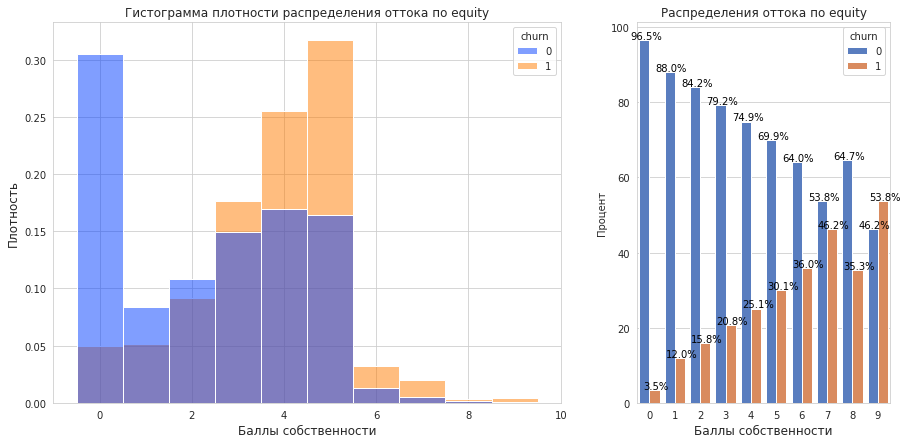

In [33]:
draw_distrib_density(df, 'equity', flag_kde=False, 
                         flag_discrete=True, boxplot=False, 
                         name_param='Баллы собственности')

Признаки оттока по `equity`:
* Баллы собственности в диапазоне от 3 включительно.
<br><br>

Общее распределение по `equity`:
* Ниже среднего ([в 18%](#Общее-распределение--категориальных-данных)) отток у клиентов от 2 баллов собственности и ниже. 
* Прослеживается прямая зависимость оттока от баллов собственности. При увеличение баллов собственности - увеличивается отток.
* [Малый процент клиентов имеет балл собственности более 5](#Общее-распределение--категориальных-данных).
* Минимальный отток при нулевых баллах - вероятно связано с низкими доходами и ограниченными финансовыми возможностями

##### Отток по balance

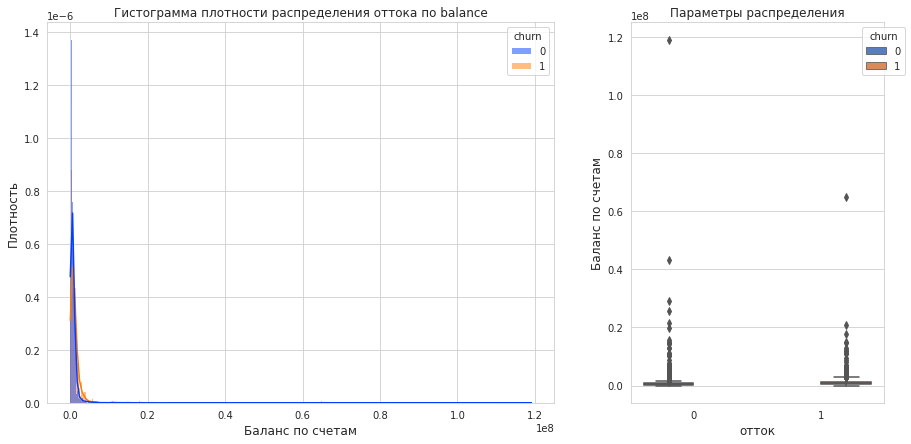

In [34]:
draw_distrib_density(df, 'balance', flag_kde=True, 
                         flag_discrete=False, boxplot=True, 
                         name_param='Баланс по счетам')

Наблюдаются экстремально высокие значения по балансу. <br>
[Среднее значение ≈800 т.руб, медианна ≈500 т.руб](#Открытие-файлов-с-данными-и-вывод-общей-информации) <br>
Выполним фильтрацию данных для визуального анализа. Для определения верхней границы будем использовать статистический метод
"третий квартиль + 3*IQR". 

In [35]:
# расчет верхней границы
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1
Q3 + 3*IQR

3033108.715

Выполним фильтрацию данных, ограничив максимальный баланс 3 млн руб для корректного визуального анализа.

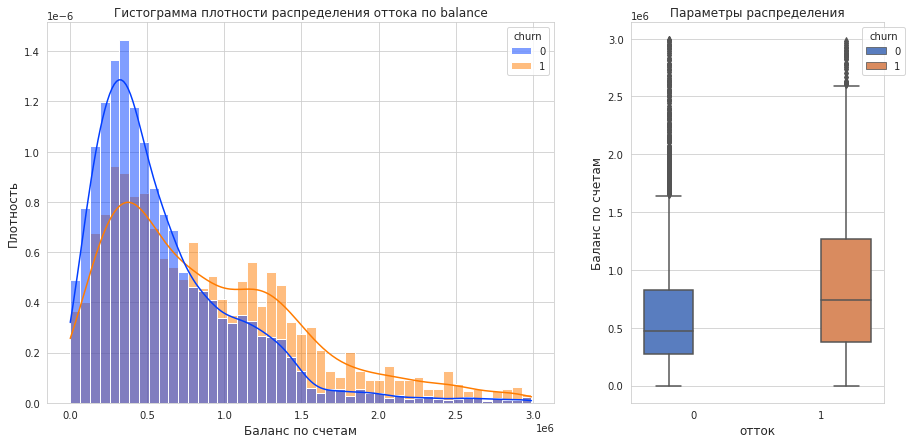

In [36]:
draw_distrib_density(df[df.balance<=3*10**6], 'balance', flag_kde=True, 
                         flag_discrete=False, boxplot=True, 
                         name_param='Баланс по счетам')

Признаки оттока по `balance`:
* Баланс на счетах банка свыше 750 т.руб.
<br><br>

Общее распределение по `balance`:
* У отточных клиентов медианный баланс выше и разброс значений больше.
<br><br>

*Клиенты с балансом на счете >3 млн рублей были исключены из визуального анализа в связи с их аномальными значениями, которые снижают читаемость графиков.*

##### Отток по products

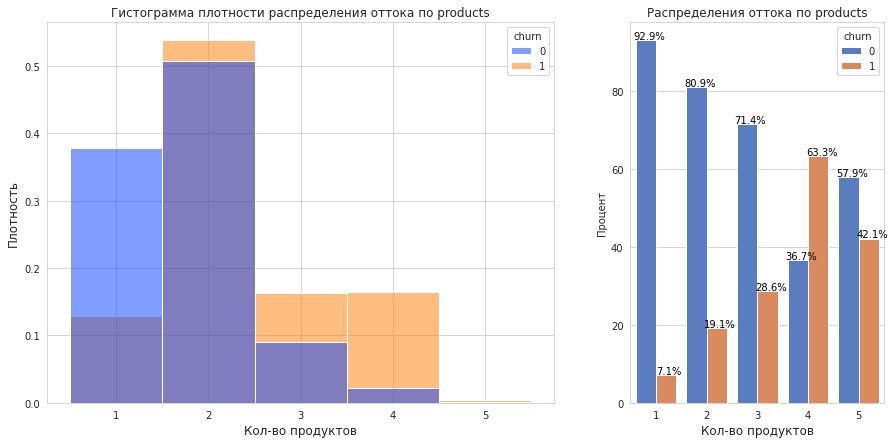

In [37]:
draw_distrib_density(df, 'products', flag_kde=False, 
                         flag_discrete=True, boxplot=False, 
                         name_param='Кол-во продуктов')

Признаки оттока по `products`:
* Количество используемых продуктов от 2 включительно.
<br><br>

Общее распределение по `products`:
* Ниже среднего ([в 18%](#Общее-распределение--категориальных-данных)) отток у клиентов которые пользуются только 1 продуктом. 
* Прослеживается прямая зависимость оттока от количества используемых продуктов. При увеличение кол-ва используемых продуктов - увеличивается отток.
* [Малый процент клиентов пользуется более 2](#Общее-распределение--категориальных-данных).

##### Отток по credit_card

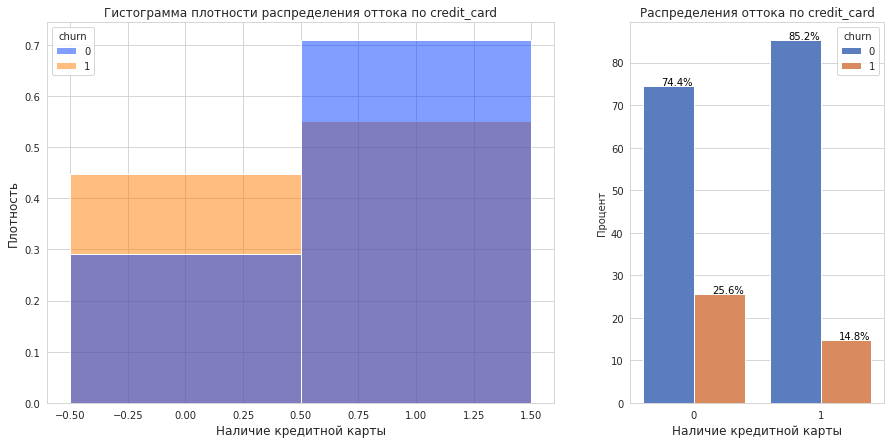

In [38]:
draw_distrib_density(df, 'credit_card', flag_kde=False, 
                         flag_discrete=True, boxplot=False, 
                         name_param='Наличие кредитной карты')

Признаки оттока по `credit_card`:
* Клиенты без кредитных карт больше подвержены оттоку.
<br><br>

Общее распределение по `credit_card`:
* Доля оттока среди клиентов без кредитных карт заметно выше.
* [У большинства клиентов есть кредитные карты (68%)](#Общее-распределение--категориальных-данных).

##### Отток по last_activity

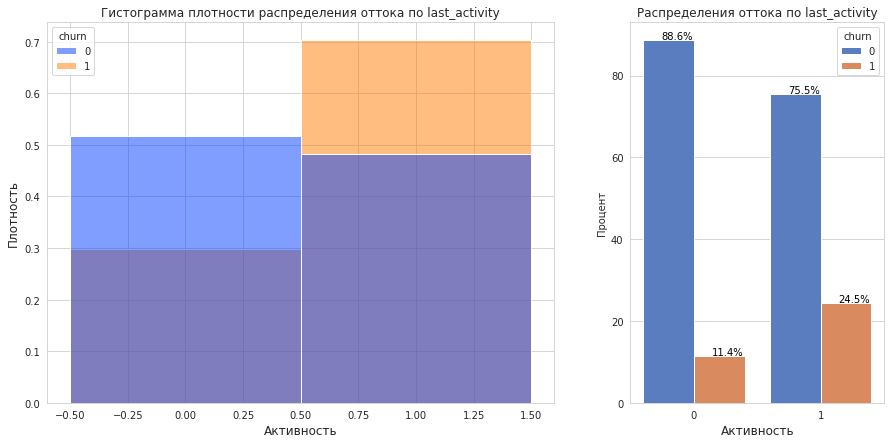

In [39]:
draw_distrib_density(df, 'last_activity', flag_kde=False, 
                         flag_discrete=True, boxplot=False, 
                         name_param='Активность')

Признаки оттока по `last_activity`:
* Активные клиенты больше подвержены оттоку.
<br><br>

Общее распределение по `last_activity`:
* Доля оттока среди активных клиентов заметно выше.

##### Отток по est_salary

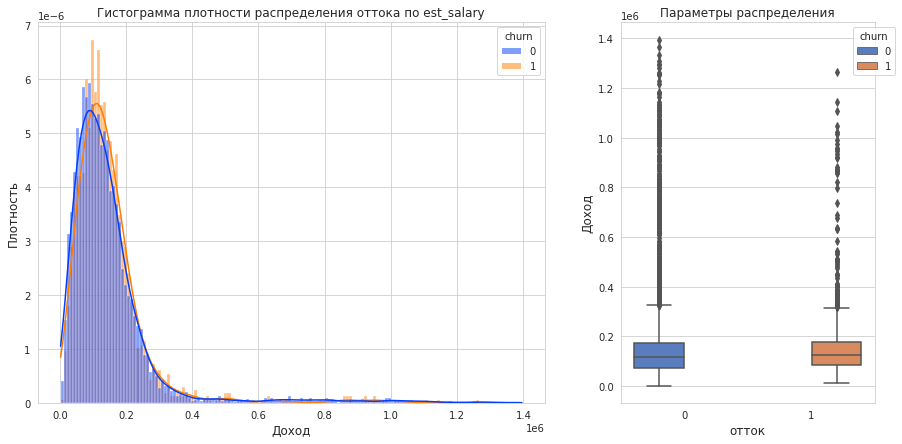

In [40]:
draw_distrib_density(df, 'est_salary', flag_kde=True, 
                         flag_discrete=False, boxplot=True, 
                         name_param='Доход')

Наблюдаются экстремально высокие значения по доходу. <br>
[Среднее значение ≈148 т.руб, медианна ≈119 т.руб](#Открытие-файлов-с-данными-и-вывод-общей-информации) <br>
Выполним фильтрацию данных для визуального анализа. Для определения верхней границы будем использовать статистический метод
"третий квартиль + 3*IQR".

In [41]:
# расчет верхней границы
Q1 = df['est_salary'].quantile(0.25)
Q3 = df['est_salary'].quantile(0.75)
IQR = Q3 - Q1
Q3 + 3*IQR

472243.7799999999

Выполним фильтрацию данных, ограничив максимальный баланс 500 т.руб для корректного визуального анализа.

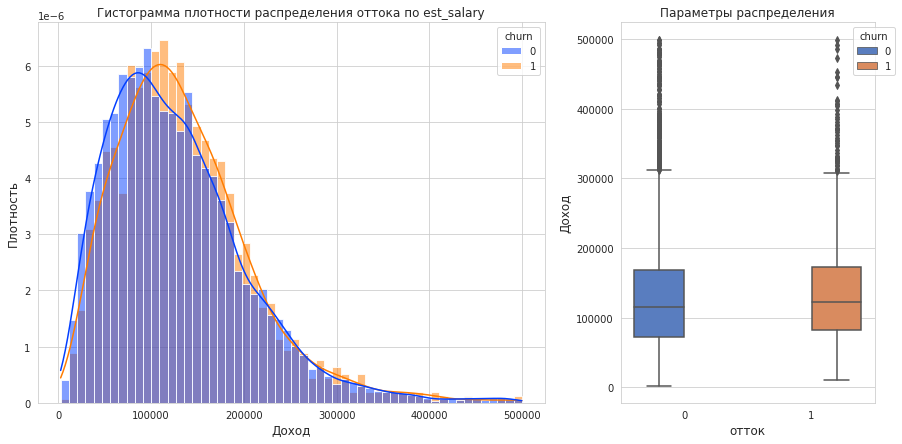

In [42]:
draw_distrib_density(df[df.est_salary<=5*10**5], 'est_salary', flag_kde=True, 
                         flag_discrete=False, boxplot=True, 
                         name_param='Доход')

Признаки оттока по `est_salary`:
* Доход в диапазоне от 100 до 220 т.руб.
* Доход в диапазоне от 270 до 350 т.руб.
<br><br>

Общее распределение по `est_salary`:
* У отточных клиентов медианный доход выше и разброс значений больше.
<br><br>

*Клиенты с доходом >500 т.руб были исключены из визуального анализа в связи с их аномальными значениями, которые снижают читаемость графиков.*

##### Вывод по подразделу

Значения параметров по риску оттока:
- `score` - баллы кредитного скоринга:
    * в диапазоне 830..910 и 930..940 включительно.
- `city` - город:
    * доля оттока равномерная (16..19%), но Рыбинск показывает более высокую лояльность клиентов.
- `gender` - пол клиента:
    * мужчины больше подвержены оттоку.
- `age` - возраст клиента:
    * в диапазоне 25..35 и 50..60 включительно.
- `equity` - баллы собственности:
    * в диапазоне от 3 и выше.
    * при увеличении параметра растет доля оттока.
- `balance` - баланс на счете клиента:
    * свыше 750 т.руб
- `products` - количество продуктов которыми пользуется клиент:
    * в диапазоне от 2 и выше.
    * при увеличении параметра растет доля оттока.
- `credit_card` - наличие кредитных карт у клиента:
    * отсутствие кредитных карт.
- `last_activity` - является ли клиент активным:
    * активные клиенты.
- `est_salary` - общий расчетный доход:
    * в диапазоне 100..220 и 270..350 т.руб.

<br> <br>

Ключевые закономерности в данных:
- [всего в отток попали 18% клиентов](#Общее-распределение--категориальных-данных).
- у отточных клиентов медианный баланс на счете (`balance`) выше и разброс значений больше.
- у отточных клиентов медианный доход выше и разброс значений больше.
- ниже среднего ([в 18%](#Общее-распределение--категориальных-данных)) отток у клиентов которые пользуются только 1 продуктом. 
- [малый процент клиентов пользуется более 2 продуктами](#Общее-распределение--категориальных-данных).
- [у большинства клиентов есть кредитные карты (68%)](#Общее-распределение--категориальных-данных).
- [больше половины клиентов находятся в городе Ярославле](#Общее-распределение--категориальных-данных).

<br> <br>

*Примечание:* <br>
*Клиенты с балансом на счете >3 млн руб и клиенты с доходом >500 т.руб были исключены из визуального анализа т.к. являются аномальными от общего сегмента клиентов и снижают читаемость графиков.*

Обратить внимание:
* Большую проблему может составлять то, что к оттоку склонны клиенты с высоким балансом на счете и высоким доходом. Требуется анализ причин и разработка программ удержания premium-сегмента.
* На первый взгляд кажется странным то, что к оттоку склонны активные клиенты, которые пользуются больше 1 продуктом банка.

#### Анализ корреляций

Проанализируем корреляцию между параметрами.

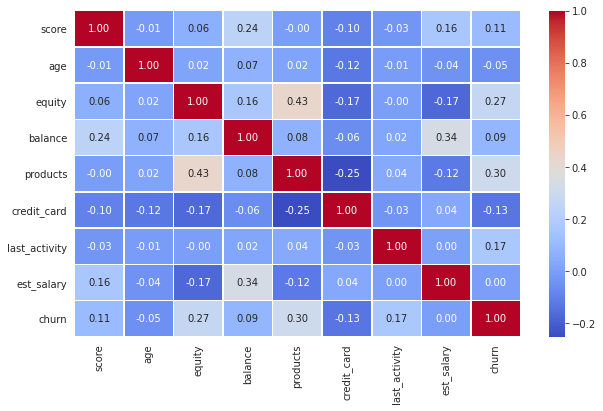

In [43]:
# отображение корреляции между параметрами (метод Пирсона)
temp_list = ['user_id', 'city', 'gender'] # список полей для исключения

# строим тепловую карту
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.drop(columns=temp_list).corr(method='pearson'),    
            annot=True,                # показывать значения в ячейках
            fmt=".2f",                # формат чисел 
            cmap='coolwarm',          # цветовая схема
            linewidths=0.5           # толщина линий между ячейками
            )

plt.show()

In [82]:
from scipy.stats import chi2_contingency

list_fields = ['credit_card', 'last_activity', 'equity']

for field in list_fields:
    # cтроим таблицу сопряженности
    contingency_table = pd.crosstab(df['churn'], df[field])

    # вычисляем хи-квадрат и коэффициент фи
    chi2, p, dof, expected = chi2_contingency(contingency_table, correction=False)
    n = contingency_table.sum().sum()  # общее число наблюдений
    phi = np.sqrt(chi2 / n) # коэффициент фи

    print(f"Коэффициент фи для churn-{field} = {phi:.3f}, p_value={p:.4f}")

Коэффициент фи для churn-credit_card = 0.130, p_value=0.0000
Коэффициент фи для churn-last_activity = 0.170, p_value=0.0000
Коэффициент фи для churn-equity = 0.272, p_value=0.0000


* сильных (≥0.7) и умеренных (≥0.5..<0.7) связей не обнаруженно.
* слабая связь (≥0.3..<0.5) у параметров:
    - equity-products
    - balance-est_salary 

<br><br>
*Примечание: оценивать корреляцию между бинаризированными данными (city и gender) некорректно.*

Т.к. в рамках анализа нас интересует корреляция с оттоком, рассмотрим отдельно отток

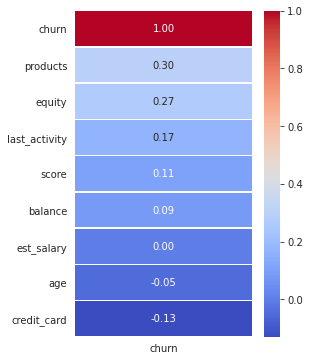

In [44]:
# отображение корреляции между параметрами и оттоком
temp_list = ['user_id', 'city', 'gender'] # список полей для исключения

# строим тепловую карту
fig, ax = plt.subplots(figsize=(4, 6))
# для удобства отдельно составим DataFrame с корреляции оттока
cm = pd.DataFrame(df.drop(columns=temp_list)
                  .corr(method='pearson')['churn']
                  .sort_values(ascending=False))
sns.heatmap(cm,    
            annot=True,                # показывать значения в ячейках
            fmt=".2f",                # формат чисел 
            cmap='coolwarm',          # цветовая схема
            linewidths=0.5           # толщина линий между ячейками
            )

plt.show()

По всем параметрам наблюдаем очень слабую или отсутствующую связь с оттоком. Это может быть связано с низким процентом общего оттока (18%, несбалансированные данные) и бинарным показателям целевой переменной (оттоком). <br>
Самые высокие показатели корреляции у параметров: `products`, `equity`, `last_activity`, `gender`, `credit_card`. <br>
Самые низкие показатели корреляции у параметров: `est_salary`, `age`, `balance`. <p>
[В анализе примем во внимание распределение коэффициентов корреляции, но будем опираться на данные по сегментам каждого параметра](#Вывод-по-подразделу)

#### Составление портрета уходяшего клиента

* Пол: мужской
* Возраст: молодой (25-30 лет) или зрелый (50-60 лет)
* Город: любой
* Доход: больше среднего (группа риска: 100-200 т.руб или 270-350 т.руб)
* Баланс на счетах: высокий (группа риска: свыше 750 т.руб)
* Активность: активный
* Используемые продукты: несколько (группа риска: от двух и более)
* Наличие кредитных карт: нет
* Собственность: имеется (группа риска: от трех баллов и выше)
* Баллы кредитного скоринга: высокие значения (группа риска: 830-940)

#### Дополнительный анализ

Проведем дополнительный анализ по городу и возрасту / доходу уходящих клиентов

In [45]:
# раcчитываем кол-во клиентов по параметру и оттоку для всех возрастных сегментов
destrib_churn_age = calc_churn_on_param(
    df.query('25 <= age <= 30 or 50 <= age <= 60'), # df c возрастными сегментами
    'city')

# добавляем % для молодых клиентов
destrib_churn_age[['cnt_1', 'percent_young']] = calc_churn_on_param(
    df.query('25 <= age <= 30'), # df c возрастными сегментами
    'city')[['cnt_users', 'percent']]

# добавляем % для зрелых клиентов
destrib_churn_age[['cnt_2','percent_adulthood']] = calc_churn_on_param(
    df.query('50 <= age <= 60'), # df c возрастными сегментами
    'city')[['cnt_users', 'percent']]

# добавляем доли молодых и зрелых
destrib_churn_age['fract_young'] = destrib_churn_age['cnt_1'] / destrib_churn_age['cnt_users']
destrib_churn_age['fract_adulthood'] = destrib_churn_age['cnt_2'] / destrib_churn_age['cnt_users']

# выводим только отточных клиентов 
destrib_churn_age.query('churn==1').drop(columns=['churn', 'cnt_1', 'cnt_2'])

,city,cnt_users,percent,percent_young,percent_adulthood,fract_young,fract_adulthood
1,Ростов,108,24.8,22.6,26.0,0.305556,0.694444
3,Рыбинск,191,23.3,20.1,25.1,0.314136,0.685864
5,Ярославль,455,26.8,26.0,27.4,0.424176,0.575824


**Анализ рисковых возрастных групп по городам:** <br>
Несмотря на увеличения доли молодых клиентов в Ярославле (которые в целом демонстрируют ниже уровень оттока), этот город показывает несколько более высокие показатели оттока по сравнению с другими городами. <br>
Обе возрастные группы представлены в значимом количестве и существенным оттоком.

In [46]:
# раcчитываем кол-во клиентов по параметру и оттоку для всех доходных сегментов
destrib_churn_salary = calc_churn_on_param(
    df.query('100000 <= est_salary <= 200000 or 270000 <= est_salary <= 350000'), 
    'city')

# добавляем % для сегмента 100-200 т.руб
destrib_churn_salary[['cnt_1', 'percent_100_200']] = calc_churn_on_param(
    df.query('100000 <= est_salary <= 200000'), # df c возрастными сегментами
    'city')[['cnt_users', 'percent']]

# добавляем % для сегмента 270-350 т.руб
destrib_churn_salary[['cnt_2','percent_270_350']] = calc_churn_on_param(
    df.query('270000 <= est_salary <= 350000'), # df c возрастными сегментами
    'city')[['cnt_users', 'percent']]

# добавляем доли молодых и зрелых
destrib_churn_salary['fract_100_200'] = destrib_churn_salary['cnt_1'] / destrib_churn_salary['cnt_users']
destrib_churn_salary['fract_270_350'] = destrib_churn_salary['cnt_2'] / destrib_churn_salary['cnt_users']

# выводим только отточных клиентов 
destrib_churn_salary.query('churn==1').drop(columns=['churn', 'cnt_1', 'cnt_2'])

,city,cnt_users,percent,percent_100_200,percent_270_350,fract_100_200,fract_270_350
1,Ростов,120,19.9,20.2,10.5,0.983333,0.016667
3,Рыбинск,234,19.2,19.3,17.6,0.948718,0.051282
5,Ярославль,581,20.8,20.9,20.1,0.922547,0.077453


Проверим общее распределение среднего и медианного дохода по городам.

In [47]:
# выводим средний и медианный доход по городам
# от мультииндексности не избавлялся
df.pivot_table(index='city',
               values='est_salary',
               aggfunc=['mean', 'median']
              ).reset_index().sort_values(('mean', 'est_salary'),
                                          ascending=False)

,city,mean,median
,,est_salary,est_salary
2,Ярославль,162470.356245,127919.68
1,Рыбинск,134816.215884,113335.90
0,Ростов,111518.462119,100059.38


**Анализ рисковых групп по городам и доходу:** <br>
Группа по доходу от 270 до 350 т.руб мало представлена во всех городах. Для Ростова и Рыбинска данная группа нерепрезентативна. <br>
Только для города Ярославль группа по доходу от 270 до 350 т.руб превышает среднее значение оттока. <br>
Группу по доходу от 270 до 350 т.руб можно учитывать только по городу Ярославль.
<br><br>
Общие показатели дохода заметно выше в городе Ярославле.

#### Вывод по разделу

**Портрет уходящего клиента:**
* Пол: мужской
* Возраст: молодой (25-30 лет) или зрелый (50-60 лет)
* Город: любой
* Доход: больше среднего (группа риска: 100-200 т.руб или 270-350 т.руб)
* Баланс на счетах: высокий (группа риска: свыше 750 т.руб)
* Активность: активный
* Используемые продукты: несколько (группа риска: от двух и более)
* Наличие кредитных карт: нет
* Собственность: имеется (группа риска: от трех баллов и выше)
* Баллы кредитного скоринга: высокие значения (группа риска: 830-940)

На основе анализа распределения оттока по параметрам и корреляции малозначимые признаки определены: `city`, `age`, `est_salary`. Необходимо проверить их влияние на отток при помощи статистических тестов.


### Проверка гипотез

Определим необходимые функции для раздела.

In [48]:
# функция вычисляет и возвращает параметры для двух выборок
def stats_param(data_1, data_2, name_1='data_1', name_2='data_2'):
    """
    Вычисляет основные статистические параметры для двух выборок и возвращает их в виде DataFrame.
    
    Параметры:
    data_1 : Первая выборка данных (Pandas Series)
    data_2 : Вторая выборка данных (Pandas Series)
    name_1 : Название первой выборки (по умолчанию 'data_1')
    name_2 : Название второй выборки (по умолчанию 'data_2')
    
    Возвращает:
    DataFrame с вычисленными параметрами для обеих выборок,
            где строки - параметры, а столбцы - выборки.
    """
    
    # вычисляем параметры и заносим их в словарь
    stats_values = {
    'Количество': [data_1.count(), data_2.count()],
    'Среднее': [data_1.mean(), data_2.mean()],
    'Медиана': [data_1.median(), data_2.median()],
    'Дисперсия': [data_1.var(), data_2.var()],
    'Ст. отклонение': [data_1.std(), data_2.std()],
    'MIN': [data_1.min(), data_2.min()],
    'MAX': [data_1.max(), data_2.max()]
                    }
    
    # cоздаем DataFrame 
    stats_df = pd.DataFrame(stats_values)
    stats_df = stats_df.rename(index={0:name_1, 1:name_2}).T 
    
    return stats_df

In [49]:
# функция строит графики для проверки нормального распределения 
# для двух выборок
def draw_norm(data_1, data_2, name_1='data_1', name_2='data_2', name_param='parametr'):
    """
    Строит графики для проверки нормальности распределения двух выборок.
    Создает 2x2 матрицу графиков:
    - В первом столбце: гистограммы с кривыми плотности распределения (KDE)
    - Во втором столбце: Q-Q графики для проверки нормальности распределения
    
    Параметры:
    data_1 : Первая выборка данных (Pandas Series)
    data_2 : Вторая выборка данных (Pandas Series)
    name_1 : Название первой выборки (по умолчанию 'data_1')
    name_2 : Название второй выборки (по умолчанию 'data_2')
    name_param : Название параметра для отображения на гистограмме (по умолчанию 'parametr')
    
    Возвращает: None (функция только отображает графики) 
    """
        
    fig, ax = plt.subplots(2, 2, figsize=(10, 5))
    
    for row in range(2):
        temp_data = data_1 if row==0 else data_2 # выбор данных
        name_data = name_1 if row==0 else name_2 # выбор наиманования данных

        # гистограмма с плотностью распределения
        sns.histplot(temp_data, kde=True, color='#0F52BA', ax=ax[row,0])

        # Q-Q график
        stats.probplot(temp_data, dist="norm", plot=ax[row,1])

        # настройки графика
        ax[row,0].set_title(f'Гистограмма с KDE {name_data}')
        ax[row, 1].set_title(f'Q-Q график {name_data}')
        ax[row, 0].set_ylabel('Количество')
        ax[row, 0].set_xlabel(name_param)
        ax[row, 1].set_ylabel('Эмпирический квантиль')
        ax[row, 1].set_xlabel('Теоретический квантиль')   
        plt.tight_layout() # чтобы не накладывались надписи

    plt.show

#### Гипотеза 1: различие дохода ушедших и оставшихся клиентов

**Цель:** Проверить отличаются ли средние доходы ушедших и оставшихся клиентов.
<br><br>
**Гипотеза:** <br>
Нулевая гипотеза H<sub>0</sub> - средние доходы ушедших и оставшихся клиентов одинаковые μ<sub>churn</sub>=μ<sub>cur</sub>. <br>

Альтернативная гипотеза H<sub>1</sub> - средние доходы ушедших и оставшихся клиентов различны μ<sub>churn</sub>≠μ<sub>cur</sub>.

Примем:
* **data_1** - данные доходов **ушедших клиентов**
* **data_2** - данные доходов **оставшихся клиентов**

In [50]:
# выборка 1
data_1 = df[df.churn==1]['est_salary'].dropna()

# выборка 2
data_2 = df[df.churn==0]['est_salary'].dropna()

# вычисляем статистические параметры для обеих выборок
stats_param(data_1, data_2, name_1='churn', name_2='current')

,churn,current
Количество,1.818000e+03,8.155000e+03
Среднее,1.483575e+05,1.476746e+05
Медиана,1.254089e+05,1.182276e+05
Дисперсия,1.511227e+10,2.035884e+10
Ст. отклонение,1.229320e+05,1.426844e+05
MIN,1.088027e+04,2.546300e+03
MAX,1.263028e+06,1.395064e+06


Проверим на нормальность распределения визуально при помощи графика распределния (гистограммы) и графика квантиль-квантиль (Q-Q)

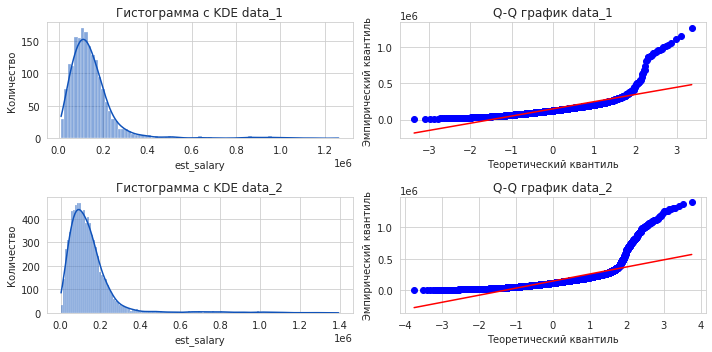

In [51]:
# строим графики для проверки норм. распределения
draw_norm(data_1, data_2, 
          name_1='data_1', name_2='data_2', name_param='est_salary')

На основании визуального анализа графиков распределения можно предположить, что данные обеих выборок имеют левосторонию ассиметрию. <br>
Проведем два статистических теста о равенстве средних:
1) Для полных генеральных совокупностей - двухвыборочный u-тест Манна-Уитни (двусторонний вариант для независимых выборок).
2) Для выборок со срезом до <=500000 - предположительно двухвыборочный t-тест Стьюдента (двусторонний вариант для независимых выборок).

In [52]:
# двухсторонний тест Манна-Уитни (независимые выборки) 

# данные (повторно формируем в ячейки, чтобы обеспечить независимость выполнения)
data_1 = df[df.churn==1]['est_salary'].dropna() # выборка 1
data_2 = df[df.churn==0]['est_salary'].dropna() # выборка 2

alpha = 0.05 # уровень альфа принимаем за 5%

# проведение двухсторонний теста Манна-Уитни
results = stats.mannwhitneyu(data_1, data_2,
                               alternative='two-sided')

# выводим полученое p-value
print(f"p-value (u-тест): {results.pvalue}")
# выводим полученое u-статистику
print(f"u-статистика: {results.statistic:.2f}")

# вывод
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-value (u-тест): 0.00016830729188229058
u-статистика: 7830548.00
Отвергаем нулевую гипотезу


Уровень статистической значимости принимаем за 0.05. <br>
Тест показал низкое значение p-value <0.001 (есть статистически значимые различия между выборками при заданном уровне альфа). <br><br>

**Отвергаем нулевую гипотезу: доход ушедших и оставшихся клиентов статистически различны.**

##### Дополнительные проверки гипотезы 1

**Проведем второй тест с выборкой до 500000:**

In [53]:
# выборка 1 с фильтрацией
data_1_filter = df[(df.churn==1) & (df.est_salary<=5*10**5)]['est_salary'].dropna()

# выборка 2 с фильтрацией
data_2_filter = df[(df.churn==0) & (df.est_salary<=5*10**5)]['est_salary'].dropna()

# вычисляем статистические параметры для обеих выборок
stats_param(data_1_filter, data_2_filter, name_1='churn', name_2='current')

,churn,current
Количество,1.781000e+03,7.926000e+03
Среднее,1.347214e+05,1.278821e+05
Медиана,1.231396e+05,1.157150e+05
Дисперсия,5.390818e+09,5.733289e+09
Ст. отклонение,7.342219e+04,7.571848e+04
MIN,1.088027e+04,2.546300e+03
MAX,4.989798e+05,4.994862e+05


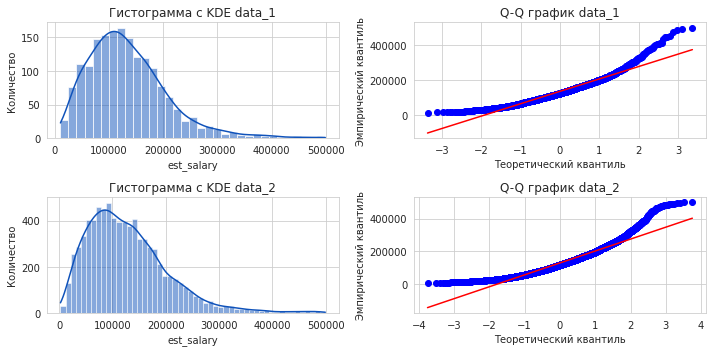

In [54]:
# строим графики для проверки норм. распределения
draw_norm(data_1_filter, data_2_filter, 
          name_1='data_1', name_2='data_2', name_param='est_salary')

После удаления экстремальных значений нормальность распределения улучшилась, однако сохранилась значимая асимметрия. Учитывая большой объём выборки (n > 1000), это отклонение не должно существенно влиять на результаты статистического анализа благодаря центральной предельной теореме (ЦПТ). Для подстраховки проведем аналогичный предыдущему u-тест и t-тест после логарифмизации данных. 

In [55]:
# двухсторонний тест Манна-Уитни (независимые выборки) 

# данные (повторно формируем в ячейки, чтобы обеспечить независимость выполнения)
# выборка 1 с фильтрацией
data_1_filter = df[(df.churn==1) & (df.est_salary<=5*10**5)]['est_salary'].dropna()
# выборка 2 с фильтрацией
data_2_filter = df[(df.churn==0) & (df.est_salary<=5*10**5)]['est_salary'].dropna()

alpha = 0.05 # уровень альфа принимаем за 5%

# проведение двухсторонний теста Манна-Уитни
results = stats.mannwhitneyu(data_1_filter, data_2_filter,
                               alternative='two-sided')

# выводим полученое p-value
print(f"p-value (u-тест): {results.pvalue}")
# выводим полученое u-статистику
print(f"u-статистика: {results.statistic:.2f}")

# вывод
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-value (u-тест): 8.70501950791534e-06
u-статистика: 7533337.00
Отвергаем нулевую гипотезу


Уровень статистической значимости принимаем за 0.05. <br>
Тест показал низкое значение p-value <0.001 (есть статистически значимые различия между выборками при заданном уровне альфа). <br><br>

**Отвергаем нулевую гипотезу: доход ушедших и оставшихся клиентов статистически различны.**

Попробуем выполнить t-тест после логарифмирования данных

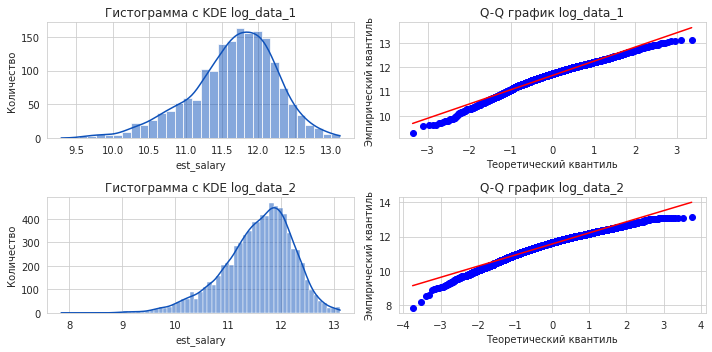

In [56]:
# логарифмируем данные
log_data_1 = np.log(data_1_filter)
log_data_2 = np.log(data_2_filter)

# строим графики для проверки норм. распределения
draw_norm(log_data_1, log_data_2, 
          name_1='log_data_1', name_2='log_data_2', name_param='est_salary')

После логарифмизации данные имеют почти нормальное распределение. Учитывая большой объём выборок (n>100), данное отклонение не должно существенно влиять на результаты статистического анализа благодаря центральной предельной теореме (ЦПТ). <p>
Для проверки гипотезы о равенстве средних применяем двухвыборочный t-тест Стьюдента (двусторонний вариант для независимых выборок).

In [57]:
# двухсторонний т-тест на лог.данных (независимые выборки) 

alpha = 0.05 # уровень альфа принимаем за 5%

# проведение двухстороннего т-теста (независимые выборки)
results = stats.ttest_ind(log_data_1, log_data_2,
                               alternative='two-sided') # двухстороняя альтернатива

# выводим полученое p-value
print(f"p-value (т-тест): {results.pvalue}")
# выводим полученое t-статистику
print(f"t-статистика: {results.statistic:.5f}")

# вывод
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-value (т-тест): 5.281880051334682e-07
t-статистика: 5.01916
Отвергаем нулевую гипотезу


Уровень статистической значимости принимаем за 0.05. <br>
Тест показал низкое значение p-value <0.001 (есть статистически значимые различия между выборками при заданном уровне альфа). <br><br>

**Отвергаем нулевую гипотезу: средний доход ушедших и оставшихся клиентов статистически различны.**

##### Вывод по гипотезе 1

Проведено три статистических теста:
* u-тест Манна-Уитни на генаральных совокупностях,
* u-тест Манна-Уитни на выборках со срезом до 500000,
* t-тест на логарифмированных выборках со срезом до 500000).
<br>

Во всех случаях **получены статистически значимые различия (pvalue <0.05) между распределениями доходов ушедших и оставшихся клиентов**.

<br>
Результаты согласованно указывают, что доходы ушедших клиентов выше по сравнению с оставшимися клиентами.

#### Гипотеза 2: различие уровня оттока между городами

**Цель:** Проверить отличаются ли уровни оттока ушедших и оставшихся клиентов по городам.
<br><br>

**Гипотеза:** <br>
Нулевая гипотеза H<sub>0</sub> - уровень оттока ушедших и оставшихся клиентов одинаковый по городам. <br>

Альтернативная гипотеза H<sub>1</sub> - уровень оттока ушедших и оставшихся клиентов различный по городам.

Так как данные по оттоку предствлены в бинарном виде будем использовать метод хи-квадрат Пирсона для таблиц 3х2. <br><br>
Примем:
* **data_1** - данные оставшиеся/ушедший клиент в **Ярославле**
* **data_2** - данные оставшиеся/ушедший клиент в **Рыбинске**
* **data_3** - данные оставшиеся/ушедший клиент в **Ростове**

In [58]:
# выборка 1 [оставшиеся клиенты / ушедшие клиенты]
data_1 = [df[(df.city=='Ярославль') & (df.churn==0)].shape[0],
          df[(df.city=='Ярославль') & (df.churn==1)].shape[0]]

# выборка 2 [оставшиеся клиенты / ушедшие клиенты]
data_2 = [df[(df.city=='Рыбинск') & (df.churn==0)].shape[0],
          df[(df.city=='Рыбинск') & (df.churn==1)].shape[0]]

# выборка 3 [оставшиеся клиенты / ушедшие клиенты]
data_3 = [df[(df.city=='Ростов') & (df.churn==0)].shape[0],
          df[(df.city=='Ростов') & (df.churn==1)].shape[0]]

# выводим таблицу сопряженности
pd.DataFrame([data_1, data_2, data_3], index=['Ярославль', 'Рыбинск', 'Ростов'])

,0,1
Ярославль,4758,1117
Рыбинск,2246,436
Ростов,1151,265


Критерии метода хи-квадрат Пирсона соблюдены:
* частота во всех ячейках таблицы сопряженности >5,
* большая выборка

In [59]:
# проводим тест хи-квадрат Пирсона 

# данные (повторно формируем в ячейки, чтобы обеспечить независимость выполнения)
# выборка 1 [оставшиеся клиенты / ушедшие клиенты]
data_1 = [df[(df.city=='Ярославль') & (df.churn==0)].shape[0],
          df[(df.city=='Ярославль') & (df.churn==1)].shape[0]]

# выборка 2 [оставшиеся клиенты / ушедшие клиенты]
data_2 = [df[(df.city=='Рыбинск') & (df.churn==0)].shape[0],
          df[(df.city=='Рыбинск') & (df.churn==1)].shape[0]]

# выборка 3 [оставшиеся клиенты / ушедшие клиенты]
data_3 = [df[(df.city=='Ростов') & (df.churn==0)].shape[0],
          df[(df.city=='Ростов') & (df.churn==1)].shape[0]]

alpha = 0.05 # уровень альфа принимаем за 5%

# проведение теста хи-квадрат Пирсона 
results = stats.chi2_contingency([data_1, data_2, data_3])

# # для новой версии
# p_value = results.pvalue
# x_stats = results.statistic

# для старой версии
p_value = results[1]
x_stats = results[0]

# выводим полученое p-value
print(f"p-value (хи-квадрат): {p_value}")
# выводим полученое Х-статистику
print(f"Х-статистика: {x_stats:.2f}")

# вывод
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-value (хи-квадрат): 0.008044722995015642
Х-статистика: 9.65
Отвергаем нулевую гипотезу


Уровень статистической значимости принимаем за 0.05. <br>
Тест показал низкое значение p-value <0.001 (есть статистически значимые различия между выборками при заданном уровне альфа). <br><br>

**Отвергаем нулевую гипотезу: отток клиентов по городам статистически различны.**

##### Дополнительные проверки гипотезы 2

Дополнительно проверим статистические различия по всем комбинациям из 2х городов.

In [60]:
# проводим тест хи-квадрат Пирсона для папарного сравнения

# данные (повторно формируем в ячейки, чтобы обеспечить независимость выполнения)
# выборка 1 [оставшиеся клиенты / ушедшие клиенты]
data_1 = [df[(df.city=='Ярославль') & (df.churn==0)].shape[0],
          df[(df.city=='Ярославль') & (df.churn==1)].shape[0]]

# выборка 2 [оставшиеся клиенты / ушедшие клиенты]
data_2 = [df[(df.city=='Рыбинск') & (df.churn==0)].shape[0],
          df[(df.city=='Рыбинск') & (df.churn==1)].shape[0]]

# выборка 3 [оставшиеся клиенты / ушедшие клиенты]
data_3 = [df[(df.city=='Ростов') & (df.churn==0)].shape[0],
          df[(df.city=='Ростов') & (df.churn==1)].shape[0]]

# словарь со значениями по городам (ключ - название города)
city_dict = {'Ярославль': data_1,
            'Рыбинск': data_2,
            'Ростов': data_3}

# создаем список всех комбинаций без повторов значений
combo_city_2 = combinations(['Ярославль', 'Рыбинск', 'Ростов'], 2)

alpha = 0.05 # уровень альфа принимаем за 5%

for combo in combo_city_2:
    print(f'Тест хи-квадрат для {combo}:')
    # присваиваем значения для города из комбинации
    combo_data_1 = city_dict.get(combo[0])
    combo_data_2 = city_dict.get(combo[1])
        
    # проводим тест хи-квадрат Пирсона 
    results = stats.chi2_contingency([combo_data_1, combo_data_2])

    # # для новой версии
    # p_value = results.pvalue
    # x_stats = results.statistic

    # для старой версии
    p_value = results[1]
    x_stats = results[0]

    # выводим полученое p-value
    print(f"p-value (хи-квадрат): {p_value}")
    # выводим полученое Х-статистику
    print(f"Х-статистика: {x_stats:.2f}")

    # вывод
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не можем отвергнуть нулевую гипотезу")
    print('')

Тест хи-квадрат для ('Ярославль', 'Рыбинск'):
p-value (хи-квадрат): 0.0023779490090522627
Х-статистика: 9.23
Отвергаем нулевую гипотезу

Тест хи-квадрат для ('Ярославль', 'Ростов'):
p-value (хи-квадрат): 0.8265541651703177
Х-статистика: 0.05
Не можем отвергнуть нулевую гипотезу

Тест хи-квадрат для ('Рыбинск', 'Ростов'):
p-value (хи-квадрат): 0.05194054546817853
Х-статистика: 3.78
Не можем отвергнуть нулевую гипотезу



Статистическая значимая разница обнаружена только между городами Ярославль-Рыбинск. <br>
Для остальных комбинаций городов статистически значимая разница не обнаружена. <br>
Это не может объяснятся [разницей в доходах по городам](#Дополнительный-анализ) т.к. по средним и медианным значением Рыбинск находится на втором места, а разницы в оттоке между Ярославлем-Ростовом(самая малодоходная часть клиентов) не обнаружена. 


##### Вывод по гипотезе 2

Проведены статистические тесты (хи-квадрат Пирсона) оттока по городам. <br>
**Обнаружены статистически значимые различия оттока между городами Ярославль-Рыбинск**, которые не связанны с общем разницей в доходах клиентов по городам. 

#### Гипотеза 3: различие возраста ушедших и оставшихся клиентов

**Цель:** Проверить отличается ли средний возраст ушедших и оставшихся клиентов.
<br><br>
**Гипотеза:** <br>
Нулевая гипотеза H<sub>0</sub> - средний возраст ушедших и оставшихся клиентов одинаковые μ<sub>churn</sub>=μ<sub>cur</sub>. <br>

Альтернативная гипотеза H<sub>1</sub> - средний возраст ушедших и оставшихся клиентов различны μ<sub>churn</sub>≠μ<sub>cur</sub>.

Примем:
* **data_1** - возраст **ушедших клиентов**
* **data_2** - возраст **оставшихся клиентов**

In [61]:
# выборка 1
data_1 = df[df.churn==1]['age'].dropna()

# выборка 2
data_2 = df[df.churn==0]['age'].dropna()

# вычисляем статистические параметры для обеих выборок
stats_param(data_1, data_2, name_1='churn', name_2='current')

,churn,current
Количество,1818.000000,8155.000000
Среднее,41.429593,43.020846
Медиана,39.000000,40.000000
Дисперсия,124.205552,153.145751
Ст. отклонение,11.144754,12.375207
MIN,18.000000,18.000000
MAX,75.000000,86.000000


Проверим на нормальность распределения визуально при помощи графика распределния (гистограммы) и графика квантиль-квантиль (Q-Q)

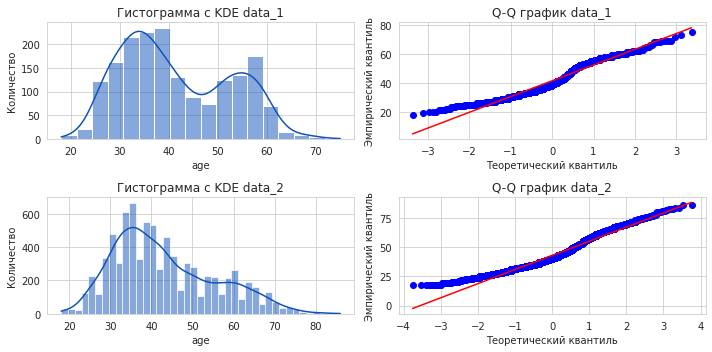

In [62]:
# строим графики для проверки норм. распределения
draw_norm(data_1, data_2, 
          name_1='data_1', name_2='data_2', name_param='age')

На основании визуального анализа графиков распределения можно предположить, что данные обеих выборок близки к нормальному распределению, за исключением незначительной левосторонней асимметрии. Учитывая большой объём выборок (n>1000), данное отклонение не должно существенно влиять на результаты статистического анализа благодаря центральной предельной теореме (ЦПТ). <p>
Для проверки гипотезы о равенстве средних применяем двухвыборочный t-тест Стьюдента (двусторонний вариант для независимых выборок).

In [63]:
# двухсторонний т-тест (независимые выборки) 

# данные (повторно формируем в ячейки, чтобы обеспечить независимость выполнения)
data_1 = df[df.churn==1]['age'].dropna() # выборка 1
data_2 = df[df.churn==0]['age'].dropna() # выборка 2

alpha = 0.05 # уровень альфа принимаем за 5%

# проведение двухстороннего т-теста (независимые выборки)
results = stats.ttest_ind(data_1, data_2,
                               alternative='two-sided') # двухстороняя альтернатива

# выводим полученое p-value
print(f"p-value (т-тест): {results.pvalue}")
# выводим полученое t-статистику
print(f"t-статистика: {results.statistic:.5f}")

# вывод
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-value (т-тест): 4.606448303493975e-07
t-статистика: -5.04536
Отвергаем нулевую гипотезу


Уровень статистической значимости принимаем за 0.05. <br>
Тест показал низкое значение p-value <0.001 (есть статистически значимые различия между выборками при заданном уровне альфа). <br><br>

**Отвергаем нулевую гипотезу: средний возраст ушедших и оставшихся клиентов статистически различны.**

##### Вывод по гипотезе 3

Проведены статистический тест (t-тест Стьюдента) оттока по возрасту. <br>
**Обнаружены статистически значимые различия оттока по возрасту**. Оттоку подвержены [две явно выраженные группы риска](#Отток-по-age)

#### Гипотеза 4: повышенный отток среди клиентов с доходом 270-350 и 220-270 тыс. руб

**Цель:** Проверить повышен ли отток клиентов с доходами между диапазонами 270-350 т.руб и 220-270 т.руб.
<br><br>

**Гипотеза:** <br>
Нулевая гипотеза H<sub>0</sub> - уровень оттока ушедших и оставшихся клиентов одинаковый для клиентов с доходом 270-350 т.руб и клиентов с доходом 220-270 т.руб. <br>

Альтернативная гипотеза H<sub>1</sub> - уровень оттока ушедших и оставшихся клиентов различный для клиентов с доходом 270-350 т.руб и клиентов с доходом 220-270 т.руб.


Так как данные по оттоку предствлены в бинарном виде будем использовать метод хи-квадрат Пирсона. <br><br>
Примем:
* **data_1** - данные оставшиеся/ушедший **клиент с доходом 270-350 т.руб**
* **data_2** - данные оставшиеся/ушедший **клиент с доходом 220-270 т.руб**

In [64]:
# выборка 1 [оставшиеся клиенты / ушедшие клиенты]
data_1 = [df.query('270*10**3 <= est_salary < 350*10**3 and churn==0').shape[0],
          df.query('270*10**3 <= est_salary < 350*10**3 and churn==1').shape[0]]

# выборка 2 [оставшиеся клиенты / ушедшие клиенты]
data_2 = [df.query('220*10**3 <= est_salary < 270*10**3 and churn==0').shape[0],
          df.query('220*10**3 <= est_salary < 270*10**3 and churn==1').shape[0]]

# выводим таблицу сопряженности
pd.DataFrame([data_1, data_2], index=['270-350 т.руб', '220-270 т.руб'])

,0,1
270-350 т.руб,252,59
220-270 т.руб,514,106


Критерии метода хи-квадрат Пирсона соблюдены:
* частота во всех ячейках таблицы сопряженности >5,
* большая выборка (>30)

In [65]:
# проводим тест хи-квадрат Пирсона 

# данные (повторно формируем в ячейки, чтобы обеспечить независимость выполнения)
# выборка 1 [оставшиеся клиенты / ушедшие клиенты]
data_1 = [df.query('270*10**3 <= est_salary < 350*10**3 and churn==0').shape[0],
          df.query('270*10**3 <= est_salary < 350*10**3 and churn==1').shape[0]]
# выборка 2 [оставшиеся клиенты / ушедшие клиенты]
data_2 = [df.query('220*10**3 <= est_salary < 270*10**3 and churn==0').shape[0],
          df.query('220*10**3 <= est_salary < 270*10**3 and churn==1').shape[0]]

alpha = 0.05 # уровень альфа принимаем за 5%

# проведение теста хи-квадрат Пирсона 
results = stats.chi2_contingency([data_1, data_2])

# # для новой версии
# p_value = results.pvalue
# x_stats = results.statistic

# для старой версии
p_value = results[1]
x_stats = results[0]

# выводим полученое p-value
print(f"p-value (хи-квадрат): {p_value}")
# выводим полученое Х-статистику
print(f"Х-статистика: {x_stats:.2f}")

# вывод
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-value (хи-квадрат): 0.5383012100057196
Х-статистика: 0.38
Не можем отвергнуть нулевую гипотезу


Уровень статистической значимости принимаем за 0.05. <br>
Тест показал высокое значение p-value ≈0.54 (статистически значимые различия между выборками при заданном уровне альфа не обнаруженны). <br><br>

**Не можем отвергнуть нулевую гипотезу: отток клиентов с доходом 270-350 т.руб и доходом 220-270 т.руб статистически не различается.**

##### Вывод по гипотезе 4

Нет статистических различий по оттоку клиентов с доходом от 220 до 270 т.руб и доходом от 270 до 350 т.руб. <br>
**[Рисковый диапазон](#Составление-портрета-уходяшего-клиента) по доходу можем объеденить в пределах от 100 т.руб до 350 т.руб.**

### Сегментация клиентов

#### Определение параметров и функций

Определяем необходимые параметры и функции

In [66]:
# создаем список по каким параметрам ведется отбор параметров (исключением)
parametrs_select = df.drop(columns=['user_id', 'churn']).columns

# создаем запросы по всем параметрам
risk_score = '(830 <= score <= 940)'
risk_city = '(city == \"Ярославль\")'
risk_gender = '(gender == \"М\")'
risk_age = '((25 <= age <= 30) or (50 <= age <= 60))'
risk_equity = '(equity >= 3)'
risk_balance = '(balance >= 750000)'
risk_products = '(products >= 2)'
risk_credit_card = '(credit_card == 0)'
risk_last_activity = '(last_activity == 1)'
risk_est_salary =  '(100*10**3 <= est_salary < 350*10**3)'

# создаем список всех рисковых параметров
risk_list = [risk_score, 
             risk_city, 
             risk_gender, 
             risk_age, 
             risk_equity, 
             risk_balance, 
             risk_products, 
             risk_credit_card,
             risk_last_activity,
             risk_est_salary
            ]

In [67]:
def create_segments_churn(data, risk_list, n_param, min_cnt, min_churn):
    """
    Генерирует сегменты клиентов с высоким оттоком на основе комбинаций запросов query.
    Составляет все возможные комбинации риск-факторов, отбирает сегменты,
    удовлетворяющие критериям минимального размера и уровня оттока, и возвращает
    отсортированный DataFrame с результатами.

    Параметры
    ----------
    data : DataFrame с данными клиентов, должен содержать:
        - колонки с риск-факторами (из risk_list)
        - колонку 'churn' с бинарным показателем оттока (1 - ушел, 0 - остался)
    risk_list : list cписок запросов query для комбинирования (названия колонок в data)
    n_param : int количество параметров в комбинации 
            (сколько риск-факторов объединять в одном сегменте)
    min_cnt : int минимальное количество клиентов в сегменте для включения в результаты
    min_churn : float минимальный уровень оттока в сегменте (доля от 0 до 1)
                                                        для включения в результаты

    Возвращает
    -------
    pandas.DataFrame
        Отсортированный DataFrame с сегментами, содержащий колонки:
        - request : str - запрос вида '<запрос_1> and <запрос_2>...'
        - cnt_clients : int - количество клиентов в сегменте
        - churn_% : str - уровень оттока в процентах
        - segment : str - список параметров сегмента (по которым был зхапрос)

    Пример использования
    --------
    create_segments_churn(data=df,
                            risk_list=risk_list,
                            n_param = 3, # комбинации по n_param вариантов
                            min_cnt = 1000, # минимальное кол-во клиентов в сегменте
                            min_churn = 0.4 # минимальный доля оттока в сегменте
                            )
                            
    Примечание
    -----
    1. Для работы требует функцию param_from_request для преобразования запроса в список параметров.
    2. Комбинации генерируются через itertools.combinations.
    """
    
    df_actual_segments = pd.DataFrame( # DataFrame актуальных сегментов 
        columns=['request', 'cnt_clients', 'churn_%'])

    all_combo = combinations(risk_list, n_param)# комбинации по n_param вариантов                                ) 
    for combo in all_combo: # поочередна обрабатываем каждую комбинации
        combo_request = ' and '.join(combo) # создаем комбинированный запрос query   
        combo_df = data.query(combo_request) # df с данными по сегменту
        cnt_clients = combo_df.shape[0] # кол-во клиентов в сегменте
        mean_churn = combo_df.churn.mean() # доля оттока в сегменте
        # при соблюдении условий добавляем запрос в список актуальных сегментов
        if cnt_clients>=min_cnt and mean_churn>=min_churn:
            # формируем строка для добавления в вывод
            new_row = {'request':combo_request,
                       'cnt_clients':cnt_clients,
                       'churn_%':f'{mean_churn*100:.2f}'}
            # добавляем строку в конец df по индексу
            df_actual_segments.loc[len(df_actual_segments)] = new_row

        # добавим данные по сегменту отбора (список параметров)
        df_actual_segments['segment'] = df_actual_segments['request'] \
                                                .transform(param_from_request)
    # настраиваем отображение
    df_actual_segments = df_actual_segments.sort_values('churn_%',
                                                        ascending=False
                                                       ).reset_index(drop=True)
    
    return df_actual_segments # возвращаем полученный df с сегментами

In [68]:
# функция для отображение параметров в запросе (используятся для transform)
def param_from_request(x, parametrs_list=parametrs_select):
    '''
    Функция возрашает строку с параметрами, по которым был собран запрос.
    ----------
    x : значение ячейки request
    parametrs_list : список параметров по которым ведется поиск
                                    (по умолчанию parametrs_temp)
    ----------
    return : возвращает строку с перечнем параметров в запросе
    '''
    value = list()
    for parametr in parametrs_list:
        if x.find(parametr) != -1: # если найден
            value.append(parametr)
    return ', '.join(value)

In [69]:
def frequency_parametr_in_request(data, parametrs_list=parametrs_select):
    """
    Функция определяет с какой частотой параметр встречается в рисковых сегментах 
                                                            (в колонке 'segment')
    Подсчитывает абсолютное и относительное количество вхождений каждого параметра
    из списка в строки сегментов. Результат возвращает в виде отсортированного DataFrame.

    Параметры:
    ----------
    data : входной DataFrame, содержащий колонку 'segment' с текстовыми данными.
        Формат данных в колонке: строки с перечислением параметров (например, "param1, param2").
    parametrs_list : список параметров для поиска (по умолчанию берется 
                                        из переменной parametrs_select).

    Возвращает
    -------
    DataFrame с результатами анализа, содержащий колонки:
        - count: абсолютное количество вхождений параметра
        - ration_%: доля вхождений в процентах от общего числа строк
    """

    # cоздаем словарь для подсчета
    parametr_counts = {parametr: 0 for parametr in parametrs_list}

    # подсчитываем вхождения каждого слова 
    for parametr in parametrs_list:
        parametr_counts[parametr] = data['segment'].str.count(parametr).sum()

    # из словаря формуруем DataFrame
    df_cnt_param = pd.DataFrame.from_dict(parametr_counts,
                                          orient='index',
                                          columns=['count']
                                         ).sort_values('count', ascending=False)

    # добавляем относительное значение частоты параметра
    df_cnt_param['ration_%'] = round(df_cnt_param['count']/df_actual_segments.shape[0]*100, 2)

    return df_cnt_param # возвращаем DataFrame

#### Проведение сегментации клиентов

Произведем сегментацию клиентов склонных к оттоку:
* комбинация по количеству параметров = 4
* минимальное количество клиентов в сегменте = 1000
* минимальная доля оттока 50%

In [70]:
# создание DataFrame c актуальными сегментами по заданым параметрам
df_actual_segments = create_segments_churn(data=df,
                                risk_list=risk_list,
                                n_param = 4, # комбинации по n_param вариантов
                                min_cnt = 1000, # минимальное кол-во клиентов в сегменте
                                min_churn = 0.5 # минимальный доля оттока в сегменте
                                            )
df_actual_segments # вывод

,request,cnt_clients,churn_%,segment
0,(830 <= score <= 940) and (products >= 2) and ...,1032,57.75,"score, products, last_activity, est_salary"
1,"(830 <= score <= 940) and (city == ""Ярославль""...",1001,54.15,"score, city, products, last_activity"
2,(830 <= score <= 940) and (equity >= 3) and (p...,1468,52.79,"score, equity, products, last_activity"
3,(equity >= 3) and (balance >= 750000) and (pro...,1151,52.30,"equity, balance, products, last_activity"


Определяем частоту использования параметров в рисковых сегментах

In [71]:
# вывод с какой частотой встречаются параметры в рисковых сегментах
frequency_parametr_in_request(data=df_actual_segments,
                              parametrs_list=parametrs_select)

,count,ration_%
products,4,100.0
last_activity,4,100.0
score,3,75.0
equity,2,50.0
city,1,25.0
balance,1,25.0
est_salary,1,25.0
gender,0,0.0
age,0,0.0
credit_card,0,0.0


Все сегменты склонные к оттоку (>50%) по 4м признакам (группы свыше 1000 человек) характеризуются активностью и использованием более одного продукта.

#### Дополнительный анализ сегментов

Проведем анализ клиентов, склонных к оттоку, с использованием различного числа параметров для определения самых частых и редких признаков.

Параметры сегментации:
* комбинация по количеству параметров - от 2х до 5ти
* минимальное количество клиентов в сегменте = 500
* минимальная доля оттока 30%

In [72]:
# проведение сегментации под разное количество параметров
for n in range(2,6):
    # создание DataFrame c актуальными сегментами по заданым параметрам
    df_actual_segments = create_segments_churn(data=df,
                                risk_list=risk_list,
                                n_param = n, # комбинации по n_param вариантов
                                min_cnt = 500, # минимальное кол-во клиентов в сегменте
                                min_churn = 0.3 # минимальный доля оттока в сегменте
                                            )
    # вывод с какой частотой встречаются параметры в рисковых сегментах
    print(f'Сегмент с {n} параметрами')
    print(f'Количество сегментов {df_actual_segments.shape[0]}')
    display(frequency_parametr_in_request(data=df_actual_segments,
                              parametrs_list=parametrs_select))

Сегмент с 2 параметрами
Количество сегментов 27


,count,ration_%
balance,9,33.33
age,7,25.93
equity,7,25.93
score,6,22.22
credit_card,6,22.22
last_activity,6,22.22
gender,5,18.52
products,5,18.52
est_salary,2,7.41
city,1,3.70


Сегмент с 3 параметрами
Количество сегментов 105


,count,ration_%
equity,36,34.29
products,35,33.33
score,33,31.43
credit_card,33,31.43
last_activity,33,31.43
balance,31,29.52
gender,30,28.57
city,28,26.67
age,28,26.67
est_salary,28,26.67


Сегмент с 4 параметрами
Количество сегментов 134


,count,ration_%
products,73,54.48
equity,68,50.75
score,64,47.76
city,58,43.28
last_activity,53,39.55
est_salary,53,39.55
gender,50,37.31
balance,47,35.07
credit_card,44,32.84
age,26,19.40


Сегмент с 5 параметрами
Количество сегментов 58


,count,ration_%
products,48,82.76
equity,43,74.14
score,38,65.52
est_salary,33,56.90
city,31,53.45
balance,30,51.72
last_activity,25,43.10
gender,23,39.66
credit_card,17,29.31
age,2,3.45


Сегментация по двум параметрам имеет низкую релевантность из-за недостаточного размера выборки (большое влияние 1 на результат). <br>
В топ5 признаков в сегментах чаще всего встречаются: equity, products, score (по три раза из четырех). <br>
Самые невостребованные признаки: age, gender, balance (ноль раз в топ5 из четырех).

Посмотрим на параметры сегмента с рисковыми значениями признаков equity, products, score.

In [73]:
# создание DataFrame c актуальными сегментами по заданым параметрам
df_actual_segments = create_segments_churn(data=df,
                                risk_list=[risk_equity, risk_products, risk_score],
                                n_param = 3, # комбинации по n_param вариантов
                                min_cnt = 0, # минимальное кол-во клиентов в сегменте
                                min_churn = 0.0 # минимальный доля оттока в сегменте
                                            )
df_actual_segments # вывод

,request,cnt_clients,churn_%,segment
0,(equity >= 3) and (products >= 2) and (830 <= ...,2815,36.02,"score, equity, products"


Данный сегмент состоит из ≈28% всех клиентов (по датасету) и характеризуется 36% оттоком, что в два раза превышает средний отток. Это самый крупный высокоотточный сегмент клиентов.

#### Вывод по разделу

**Высокоотточные сегменты обладают характеристиками:**
 <br><br>
* Сегмент 1 (количество клиентов 1032, отток ≈57%):
    - баллы кредитного скоринга `score`: от 830 до 940 включительно;
    - количество используемых продуктов `products`: более 1;
    - активность `last_activity`: да;
    - расчетный доход `est_salary`: в диапазоне от 100 т.руб до 350 т.руб.
    <br><br>
* Сегмент 2 (количество клиентов 1001, отток ≈54%):
    - баллы кредитного скоринга `score`: от 830 до 940 включительно;
    - город `city`: Ярославль;
    - количество используемых продуктов `products`: более 1;
    - активность `last_activity`: да.
    <br><br>
* Сегмент 3 (количество клиентов 1468, отток ≈52%):
    - баллы кредитного скоринга `score`: от 830 до 940 включительно;
    - количество баллов собственности `equity`: более 2;
    - количество используемых продуктов `products`: более 1;
    - активность `last_activity`: да.
    <br><br>
* Сегмент 4 (количество клиентов 1151, отток ≈52%):
    - количество баллов собственности `equity`: более 2;
    - баланс на счете `balance`: свыше 750 т.руб;
    - количество используемых продуктов `products`: более 1;
    - активность `last_activity`: да.
    <br><br>
* Сегмент 5 (количество клиентов 2815 (самый крупный отточный сегмент), отток ≈36%):
    - баллы кредитного скоринга `score`: от 830 до 940 включительно;
    - количество баллов собственности `equity`: более 2;
    - количество используемых продуктов `products`: более 1.
    

### Общий вывод

**Обработка данных:**
- Исправлены типы данных.
- 26 строк с пропусками `age`.
- 1 строка с нулевым количеством используемых продуктов.
- Пропуски по полю `balance` (2278 строк) оставили без изменений.
- Дубликаты по user_id оставили без изменений т.к. они обозначают разных клиентов банка.

**Исследовательский анализ данных:**
- выявлены значения параметров для высокоотточных клиентов:
    - `score` - баллы кредитного скоринга:
        * в диапазоне 830..940 включительно.
    - `city` - город:
        * доля оттока равномерная (16..19%), но Рыбинск показывает более высокую лояльность клиентов.
    - `gender` - пол клиента:
        * мужчины больше подвержены оттоку.
    - `age` - возраст клиента:
        * в диапазоне 25..35 и 50..60 включительно.
    - `equity` - баллы собственности:
        * в диапазоне от 3 и выше.
        * при увеличении параметра растет доля оттока.
    - `balance` - баланс на счете клиента:
        * свыше 750 т.руб
    - `products` - количество продуктов которыми пользуется клиент:
        * в диапазоне от 2 и выше.
        * при увеличении параметра растет доля оттока.
    - `credit_card` - наличие кредитных карт у клиента:
        * отсутствие кредитных карт.
    - `last_activity` - является ли клиент активным:
        * активные клиенты.
    - `est_salary` - общий расчетный доход:
        * в диапазоне 100..220 и 270..350 т.руб.

<br> <br>

Ключевые закономерности в данных:
- [всего в отток попали 18% клиентов](#Общее-распределение--категориальных-данных).
- у отточных клиентов медианный баланс на счете (`balance`) выше и разброс значений больше.
- у отточных клиентов медианный доход выше и разброс значений больше.
- ниже среднего ([в 18%](#Общее-распределение--категориальных-данных)) отток у клиентов которые пользуются только 1 продуктом. 
- [малый процент клиентов пользуется более 2 продуктами](#Общее-распределение--категориальных-данных).
- [у большинства клиентов есть кредитные карты (68%)](#Общее-распределение--категориальных-данных).
- [больше половины клиентов находятся в городе Ярославле](#Общее-распределение--категориальных-данных).

<br> <br>

**Потрет уходящего клиента:**
* Пол: мужской
* Возраст: молодой (25-30 лет) или зрелый (50-60 лет)
* Город: любой
* Доход: больше среднего (группа риска: 100-350 т.руб)
* Баланс на счетах: высокий (группа риска: свыше 750 т.руб)
* Активность: активный
* Используемые продукты: несколько (группа риска: от двух и более)
* Наличие кредитных карт: нет
* Собственность: имеется (группа риска: от трех баллов и выше)
* Баллы кредитного скоринга: высокие значения (группа риска: 830-940)

**Проверка гипотез:**

1) **[Гипотеза 1: различие дохода ушедших и оставшихся клиентов](#Гипотеза-1:-различие-дохода-ушедших-и-оставшихся-клиентов):** <br>

Необходимо проверить отличаются ли средние доходы ушедших и оставшихся клиентов.
<br><br> 
**Результат проверки:** средний доход ушедших и оставшихся клиентов статистически различны.
<br><br><br> 


2) **[Гипотеза 2: различие уровня оттока между городами](#Гипотеза-2:-различие-уровня-оттока-между-городами):** <br>

Необходимо проверить отличаются ли уровни оттока ушедших и оставшихся клиентов по городам.
<br><br> 
**Результат проверки:** обнаружены статистически значимые различия оттока между городами Ярославль-Рыбинск, которые не связанны с общем разницей в доходах клиентов по городам. Между остальными городами статистически значимых отличий не обнаружено. 
<br><br><br> 


3) **[Гипотеза 3: отсутствие связи между возрастом клиентов и оттоком](#Гипотеза-3:-различие-возраста-ушедших-и-оставшихся-клиентов):** <br>

Необходимо проверить отличается ли средний возраст ушедших и оставшихся клиентов.
<br><br> 
**Результат проверки:** средний возраст ушедших и оставшихся клиентов статистически различны. 
<br><br><br> 


4) **[Гипотеза 4: повышенный отток среди клиентов с доходом 270–350 т.руб и доходом 220-270 т.руб](#Гипотеза-4:-повышенный-отток-среди-клиентов-с-доходом-270-350-и-220-270-тыс.-руб):** <br>

Необходимо проверить повышен ли отток клиентов с доходами между диапазонами 270-350 т.руб и 220-270 т.руб.
<br><br> 
**Результат проверки:** нет статистических различий по оттоку клиентов с доходом от 220 до 270 т.руб и доходом от 270 до 350 т.руб. 




**Сегментация клиентов по оттоку:**
 <br><br>
* Сегмент 1 (количество клиентов 1032, отток ≈57%):
    - баллы кредитного скоринга `score`: от 830 до 940 включительно;
    - количество используемых продуктов `products`: более 1;
    - активность `last_activity`: да;
    - расчетный доход `est_salary`: в диапазоне от 100 т.руб до 350 т.руб.
    <br><br>
* Сегмент 2 (количество клиентов 1001, отток ≈54%):
    - баллы кредитного скоринга `score`: от 830 до 940 включительно;
    - город `city`: Ярославль;
    - количество используемых продуктов `products`: более 1;
    - активность `last_activity`: да.
    <br><br>
* Сегмент 3 (количество клиентов 1468, отток ≈52%):
    - баллы кредитного скоринга `score`: от 830 до 940 включительно;
    - количество баллов собственности `equity`: более 2;
    - количество используемых продуктов `products`: более 1;
    - активность `last_activity`: да.
    <br><br>
* Сегмент 4 (количество клиентов 1151, отток ≈52%):
    - количество баллов собственности `equity`: более 2;
    - баланс на счете `balance`: свыше 750 т.руб;
    - количество используемых продуктов `products`: более 1;
    - активность `last_activity`: да.
    <br><br>
* Сегмент 5 (количество клиентов 2815 (самый крупный отточный сегмент), отток ≈36%):
    - баллы кредитного скоринга `score`: от 830 до 940 включительно;
    - количество баллов собственности `equity`: более 2;
    - количество используемых продуктов `products`: более 1.
    

### Рекомендации

**Общие рекомендации:**
- исследовать причины ухода обеспеченных клиентов (`score`: от 830 до 940 включительно, `equity`: более 2, `est_salary`: в диапазоне от 100 т.руб до 350 т.руб, `balance`: свыше 750 т.руб).
- исследовать причины ухода активных пользователей (`last_activity`: да, `products`: более 1.).
- исследовать "стандартный" банковский пакет услуг. Проверить наличие услуг и их конкурентность.
- персональная работа с VIP-клиентами.
- обогатить данные:
    * дата регистрации и оттока клиента;
    * конкретизировать используемые продукты;
    * дата окончания использования кредитных продуктов;
    * программа развития банка.

**Рекомендации по сегментам:**
* Сегмент 5 (самый крупный отточный сегмент):
    - предложить индивидуальные условия и тарифы (после проведения исследования причин ухода).
    - общие рекомендации по работе с клиентами в банковской сфере. Подробные рекомендации можно сформировать после исследований причин ухода.
    <br>    <br>
* Сегмент 1 (высокоотточный сегмент):
    - программы удержания/создания дипозитов (требуется исследования по продуктам).
    - инвестиционные программы.
    - партнерские программы (скидки на страхование, ипотеку или инвестиционные продукты).
    
<br><br>
*Примечание: для формирования точных рекомендаций необходимо глубокое знание особенностей банка и его клиентов*

### Презентация

[Ссылка на презентацию](https://disk.yandex.ru/i/RoYMssZa9g7d1A)